In [1]:
import imageio
import pandas as pd 
import numpy as np
import nibabel as nb
import os
import matplotlib.pyplot as plt
from PIL import Image

### select T1 images and save their path in the csv, to be able to run the convert jpeg and then cluster the images

In [2]:
pd_csv_path = '../CSV_metadata/metadata_PD_2.csv'

In [3]:
df = pd.read_csv(pd_csv_path)
df.head()

,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,weightKg,...,Flip Angle,Acquisition Plane,Matrix X,Matrix Y,Matrix Z,Pixel Spacing X,Pixel Spacing Y,Manufacturer,Mfg Model,Field Strength
0,34,PD,100001,Baseline,168485,1047642,M,67.38,Y,87.0,...,120,SAGITTAL,256,256,192,1.00000,1.00000,SIEMENS,Verio,3.0
1,34,PD,100001,Baseline,168485,1047641,M,67.38,Y,87.0,...,120,SAGITTAL,256,256,192,1.00000,1.00000,SIEMENS,Verio,3.0
2,34,PD,100001,Baseline,168485,1047640,M,67.38,Y,87.0,...,20,AXIAL,512,512,5,0.48828,0.48828,SIEMENS,Verio,3.0
3,34,PD,100001,Baseline,168485,1047640,M,67.38,Y,87.0,...,20,CORONAL,512,512,5,0.48828,0.48828,SIEMENS,Verio,3.0
4,34,PD,100001,Baseline,168485,1047640,M,67.38,Y,87.0,...,20,SAGITTAL,512,512,5,0.48828,0.48828,SIEMENS,Verio,3.0


In [4]:
df.keys()

Index(['siteKey', 'researchGroup', 'subjectIdentifier', 'visitIdentifier',
       'studyIdentifier', 'seriesIdentifier', 'subjectSex', 'subjectAge',
       'ageQualifier', 'weightKg', 'dateAcquired', 'imageUID', 'description',
       'Acquisition Type', 'Weighting', 'Pulse Sequence', 'Slice Thickness',
       'TE', 'TR', 'TI', 'Coil', 'Flip Angle', 'Acquisition Plane', 'Matrix X',
       'Matrix Y', 'Matrix Z', 'Pixel Spacing X', 'Pixel Spacing Y',
       'Manufacturer', 'Mfg Model', 'Field Strength'],
      dtype='object')

In [8]:
T1_df = df[df['Weighting'] == 'T1']

In [9]:
T1_df.head()
T1_df.tocsv('T1_PD_images_csv_info.csv')

,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,weightKg,...,Flip Angle,Acquisition Plane,Matrix X,Matrix Y,Matrix Z,Pixel Spacing X,Pixel Spacing Y,Manufacturer,Mfg Model,Field Strength
2,34,PD,100001,Baseline,168485,1047640,M,67.38,Y,87.0,...,20,AXIAL,512,512,5,0.48828,0.48828,SIEMENS,Verio,3.0
3,34,PD,100001,Baseline,168485,1047640,M,67.38,Y,87.0,...,20,CORONAL,512,512,5,0.48828,0.48828,SIEMENS,Verio,3.0
4,34,PD,100001,Baseline,168485,1047640,M,67.38,Y,87.0,...,20,SAGITTAL,512,512,5,0.48828,0.48828,SIEMENS,Verio,3.0
5,34,PD,100001,Baseline,168485,1047630,M,67.38,Y,87.0,...,40,AXIAL,448,448,16,0.50000,0.50000,SIEMENS,Verio,3.0
6,34,PD,100001,Baseline,168485,1047631,M,67.38,Y,87.0,...,40,AXIAL,448,448,16,0.50000,0.50000,SIEMENS,Verio,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,23,PD,75484,Baseline,138553,848696,M,57.62,Y,73.9,...,8,SAGITTAL,256,256,152,0.93750,0.93750,GE MEDICAL SYSTEMS,Signa HDxt,1.5
4046,40,PD,75505,Baseline,138575,848782,M,63.99,Y,67.1,...,8,SAGITTAL,448,448,170,0.53571,0.53571,Philips Medical Systems,Achieva,1.5
4047,40,PD,75505,Baseline,138575,848779,M,63.99,Y,67.1,...,90,AXIAL,256,256,50,1.01562,1.01562,Philips Medical Systems,Achieva,1.5
4051,18,PD,75524,Baseline,156096,968271,M,54.71,Y,73.0,...,11,SAGITTAL,256,256,196,1.05470,1.05470,GE MEDICAL SYSTEMS,DISCOVERY MR750w,3.0


In [10]:
base_path = '/w/246/gzk/PPMI/MRI_PD/PPMI/'

In [11]:
cnt = 0
cnt_2 = 0
path_series_dic = {}
for index, row in T1_df.iterrows():
    tmp_root_path = os.path.join(base_path, str(row['subjectIdentifier']), row['description'].replace(' ', '_').replace('/', '_'))
    for path, dir_names, file_names in os.walk(tmp_root_path):
        if len(file_names) > 0:
            for file in file_names:
                if 'ROBEX.nii' in file: ## skull stripping output
#                 if 'FieldCorrection.nii' in file :
                    cnt += 1
                    print(path, file)
                    if str(row['seriesIdentifier']) == path.split('/')[-1][1:]:
                        cnt_2 += 1
                        path_series_dic[row['seriesIdentifier']] = os.path.join(path, file)

/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3_PLANE_LOC/2020-10-07_13_51_32.0/S1047640 PPMI_100001_MR_3_PLANE_LOC__br_raw_20210723153724894_1_S1047640_I1473190_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3_PLANE_LOC/2020-10-07_13_51_32.0/S1047640 PPMI_100001_MR_3_PLANE_LOC__br_raw_20210723153217011_8_S1047640_I1473189_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3_PLANE_LOC/2020-10-07_13_51_32.0/S1047640 PPMI_100001_MR_3_PLANE_LOC__br_raw_20210723155047026_14_S1047640_I1473188_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3_PLANE_LOC/2020-10-07_13_51_32.0/S1047640 PPMI_100001_MR_3_PLANE_LOC__br_raw_20210723153724894_1_S1047640_I1473190_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3_PLANE_LOC/2020-10-07_13_51_32.0/S1047640 PPMI_100001_MR_3_PLANE_LOC__br_raw_20210723153217011_8_S1047640_I1473189_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3_PLANE_LOC/2020-10-07_13_51_32.0/S1047640 PPMI_100001_MR_3_PLANE_LOC__br_raw_20210723155047026_14_S1047640_I1473188_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/1000

/w/246/gzk/PPMI/MRI_PD/PPMI/100267/2D_GRE-MT/2021-02-19_14_19_02.0/S1067293 PPMI_100267_MR_2D_GRE-MT__br_raw_20210928205908068_13_S1067293_I1497594_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100267/2D_GRE-MT/2021-02-19_14_19_02.0/S1067292 PPMI_100267_MR_2D_GRE-MT__br_raw_20210928205904406_11_S1067292_I1497593_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100267/2D_GRE-MT/2021-02-19_14_19_02.0/S1067295 PPMI_100267_MR_2D_GRE-MT__br_raw_20210928205908697_3_S1067295_I1497596_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100267/2D_GRE-MT/2021-02-19_14_19_02.0/S1067296 PPMI_100267_MR_2D_GRE-MT__br_raw_20210928205922201_1_S1067296_I1497597_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100267/2D_GRE-MT/2021-02-19_14_19_02.0/S1067294 PPMI_100267_MR_2D_GRE-MT__br_raw_20210928205919400_6_S1067294_I1497595_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100267/2D_GRE-MT/2021-02-19_14_19_02.0/S1067293 PPMI_100267_MR_2D_GRE-MT__br_raw_20210928205908068_13_S1067293_I1497594_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100267/2D_GRE-MT/2021-02-19

/w/246/gzk/PPMI/MRI_PD/PPMI/100952/AXIAL_2D_GRE-MT/2021-04-20_14_17_01.0/S1066143 PPMI_100952_MR_AXIAL_2D_GRE-MT__br_raw_20210924145616327_7_S1066143_I1496218_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100952/AXIAL_2D_GRE-MT/2021-04-20_14_17_01.0/S1066144 PPMI_100952_MR_AXIAL_2D_GRE-MT__br_raw_20210924145602958_8_S1066144_I1496219_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100952/AXIAL_2D_GRE-MT/2021-04-20_14_17_01.0/S1066141 PPMI_100952_MR_AXIAL_2D_GRE-MT__br_raw_20210924145614206_7_S1066141_I1496216_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100952/AXIAL_2D_GRE-MT/2021-04-20_14_17_01.0/S1066145 PPMI_100952_MR_AXIAL_2D_GRE-MT__br_raw_20210924145626275_7_S1066145_I1496220_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100952/AXIAL_2D_GRE-MT/2021-04-20_14_17_01.0/S1066143 PPMI_100952_MR_AXIAL_2D_GRE-MT__br_raw_20210924145616327_7_S1066143_I1496218_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100952/AXIAL_2D_GRE-MT/2021-04-20_14_17_01.0/S1066144 PPMI_100952_MR_AXIAL_2D_GRE-MT__br_raw_20210924145602958_8_S1066144_I1496

/w/246/gzk/PPMI/MRI_PD/PPMI/101050/2D_GRE-MT/2021-04-19_10_12_48.0/S1062049 PPMI_101050_MR_2D_GRE-MT__br_raw_20210913214116327_13_S1062049_I1491228_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101050/2D_GRE-MT/2021-04-19_10_12_48.0/S1062050 PPMI_101050_MR_2D_GRE-MT__br_raw_20210913214045890_13_S1062050_I1491229_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101050/2D_GRE-MT/2021-04-19_10_12_48.0/S1062052 PPMI_101050_MR_2D_GRE-MT__br_raw_20210913214049755_10_S1062052_I1491231_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101050/2D_GRE-MT/2021-04-19_10_12_48.0/S1062051 PPMI_101050_MR_2D_GRE-MT__br_raw_20210913214052563_1_S1062051_I1491230_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101050/2D_GRE-MT/2021-04-19_10_12_48.0/S1062048 PPMI_101050_MR_2D_GRE-MT__br_raw_20210913214047661_7_S1062048_I1491227_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101050/2D_GRE-MT/2021-04-19_10_12_48.0/S1062049 PPMI_101050_MR_2D_GRE-MT__br_raw_20210913214116327_13_S1062049_I1491228_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101050/2D_GRE-MT/2021-04-1

/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065857 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222937882_11_S1065857_I1495873_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065862 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222929209_1_S1065862_I1495878_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065866 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222919241_12_S1065866_I1495882_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065859 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222930171_6_S1065859_I1495875_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065861 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222930375_5_S1065861_I1495877_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065863 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222921343_16_S1065863_I1495879_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PP

/w/246/gzk/PPMI/MRI_PD/PPMI/101799/AXIAL_2D_GRE-MT/2021-06-22_14_09_11.0/S1066409 PPMI_101799_MR_AXIAL_2D_GRE-MT__br_raw_20210924183734422_7_S1066409_I1496501_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101799/AXIAL_2D_GRE-MT/2021-06-22_14_09_11.0/S1066409 PPMI_101799_MR_AXIAL_2D_GRE-MT__br_raw_20210924183734422_7_S1066409_I1496501_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101799/AXIAL_2D_GRE-MT/2021-06-22_14_09_11.0/S1066409 PPMI_101799_MR_AXIAL_2D_GRE-MT__br_raw_20210924183734422_7_S1066409_I1496501_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101799/AXIAL_2D_GRE-MT/2021-06-22_14_09_11.0/S1066409 PPMI_101799_MR_AXIAL_2D_GRE-MT__br_raw_20210924183734422_7_S1066409_I1496501_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101799/AXIAL_2D_GRE-MT/2021-06-22_14_09_11.0/S1066409 PPMI_101799_MR_AXIAL_2D_GRE-MT__br_raw_20210924183734422_7_S1066409_I1496501_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101799/B0rf_Map/2021-06-22_14_09_11.0/S1066404 PPMI_101799_MR_B0rf_Map___br_raw_20210924183716168_150_S1066404_I1496496_ROBEX.n

/w/246/gzk/PPMI/MRI_PD/PPMI/107099/2D_GRE-MT/2021-09-14_07_40_10.0/S1068426 PPMI_107099_MR_2D_GRE-MT__br_raw_20211001015037977_15_S1068426_I1498897_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/107099/2D_GRE-MT/2021-09-14_07_40_10.0/S1068428 PPMI_107099_MR_2D_GRE-MT__br_raw_20211001015030331_7_S1068428_I1498899_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/107099/2D_GRE-MT/2021-09-14_07_40_10.0/S1068425 PPMI_107099_MR_2D_GRE-MT__br_raw_20211001015032977_4_S1068425_I1498896_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/107099/2D_GRE-MT/2021-09-14_07_40_10.0/S1068427 PPMI_107099_MR_2D_GRE-MT__br_raw_20211001015051578_12_S1068427_I1498898_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/107099/2D_GRE-MT/2021-09-14_07_40_10.0/S1068429 PPMI_107099_MR_2D_GRE-MT__br_raw_20211001015052713_8_S1068429_I1498900_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/107099/2D_GRE-MT/2021-09-14_07_40_10.0/S1068426 PPMI_107099_MR_2D_GRE-MT__br_raw_20211001015037977_15_S1068426_I1498897_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/107099/2D_GRE-MT/2021-09-14

/w/246/gzk/PPMI/MRI_PD/PPMI/3108/MPRAGE_GRAPPA/2012-05-25_10_46_49.0/S157042 PPMI_3108_MR_MPRAGE_GRAPPA__br_raw_20120710083926201_73_S157042_I315585_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3108/MPRAGE_GRAPPA/2013-04-24_10_04_37.0/S193435 PPMI_3108_MR_MPRAGE_GRAPPA__br_raw_20130626150718041_19_S193435_I378222_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3108/MPRAGE_GRAPPA/2011-04-20_10_07_57.0/S107265 PPMI_3108_MR_MPRAGE_GRAPPA__br_raw_20110502103207351_31_S107265_I232161_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3108/MPRAGE_GRAPPA/2012-05-25_10_46_49.0/S157042 PPMI_3108_MR_MPRAGE_GRAPPA__br_raw_20120710083926201_73_S157042_I315585_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3108/MPRAGE_GRAPPA/2013-04-24_10_04_37.0/S193435 PPMI_3108_MR_MPRAGE_GRAPPA__br_raw_20130626150718041_19_S193435_I378222_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3108/MPRAGE_GRAPPA/2011-04-20_10_07_57.0/S107265 PPMI_3108_MR_MPRAGE_GRAPPA__br_raw_20110502103207351_31_S107265_I232161_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3108/MPRAGE_GRAPPA

/w/246/gzk/PPMI/MRI_PD/PPMI/3127/MPRAGE_GRAPPA/2012-09-13_09_46_13.0/S169347 PPMI_3127_MR_MPRAGE_GRAPPA__br_raw_20121002092136393_22_S169347_I337702_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3127/Sag_MPRAGE_GRAPPA/2017-01-25_13_20_33.0/S575396 PPMI_3127_MR_Sag_MPRAGE_GRAPPA__br_raw_20170627115525287_73_S575396_I864515_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3128/MPRAGE_GRAPPA2/2016-10-14_13_27_28.0/S526761 PPMI_3128_MR_MPRAGE_GRAPPA2_br_raw_20170111133905723_95_S526761_I808160_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3128/MPRAGE_GRAPPA/2012-09-20_09_34_20.0/S169354 PPMI_3128_MR_MPRAGE_GRAPPA__br_raw_20121002094744162_51_S169354_I337711_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3128/MPRAGE_GRAPPA/2013-09-19_11_23_27.0/S204513 PPMI_3128_MR_MPRAGE_GRAPPA__br_raw_20131022131543661_43_S204513_I395436_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3128/MPRAGE_GRAPPA/2012-09-20_09_34_20.0/S169354 PPMI_3128_MR_MPRAGE_GRAPPA__br_raw_20121002094744162_51_S169354_I337711_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3128/MPRA

/w/246/gzk/PPMI/MRI_PD/PPMI/3179/SAG_MPRAGE_GRAPPA/2016-08-18_10_34_07.0/S501579 PPMI_3179_MR_SAG_MPRAGE_GRAPPA__br_raw_20160926115240587_75_S501579_I778960_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3179/SAG_MPRAGE_GRAPPA/2013-08-09_10_30_44.0/S208445 PPMI_3179_MR_SAG_MPRAGE_GRAPPA__br_raw_20131218143003347_158_S208445_I402104_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3179/SAG_MPRAGE_GRAPPA/2014-07-18_10_07_43.0/S228144 PPMI_3179_MR_SAG_MPRAGE_GRAPPA__br_raw_20140820143029236_24_S228144_I440153_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3179/SAG_MPRAGE_GRAPPA/2016-08-18_10_34_07.0/S501579 PPMI_3179_MR_SAG_MPRAGE_GRAPPA__br_raw_20160926115240587_75_S501579_I778960_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3179/SAG_MPRAGE_GRAPPA/2013-08-09_10_30_44.0/S208445 PPMI_3179_MR_SAG_MPRAGE_GRAPPA__br_raw_20131218143003347_158_S208445_I402104_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3179/SAG_MPRAGE_GRAPPA/2014-07-18_10_07_43.0/S228144 PPMI_3179_MR_SAG_MPRAGE_GRAPPA__br_raw_20140820143029236_24_S228144_I440153_ROBEX.

/w/246/gzk/PPMI/MRI_PD/PPMI/3284/SAG_FSPGR_3D/2012-11-29_14_30_43.0/S186536 PPMI_3284_MR_SAG_FSPGR_3D_br_raw_20130410123216415_82_S186536_I366309_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3285/SAG_FSPGR_3D/2012-11-27_10_32_58.0/S186540 PPMI_3285_MR_SAG_FSPGR_3D_br_raw_20130410123832133_225_S186540_I366314_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3288/SAG_FSPGR_3D/2013-05-03_10_54_57.0/S190633 PPMI_3288_MR_SAG_FSPGR_3D_br_raw_20130528143609455_219_S190633_I374029_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3290/SAG_FSPGR_3D/2013-05-02_12_40_54.0/S190646 PPMI_3290_MR_SAG_FSPGR_3D_br_raw_20130528144222381_26_S190646_I374043_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3305/MPRAGE_GRAPPA/2011-08-03_15_18_51.0/S120966 PPMI_3305_MR_MPRAGE_GRAPPA__br_raw_20111005160925215_62_S120966_I254013_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3305/SAG_MPRAGE_GRAPPA/2012-08-29_13_12_19.0/S171171 PPMI_3305_MR_SAG_MPRAGE_GRAPPA__br_raw_20121017134534753_77_S171171_I340726_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3307/MPRAGE_GRAPPA/2

/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2013-09-12_10_23_17.0/S205640 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20131107155206477_50_S205640_I397591_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2012-05-30_10_04_58.0/S181422 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20130204162846046_47_S181422_I357683_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2015-07-23_11_55_18.0/S277082 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20150921094348900_131_S277082_I515228_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2013-09-12_10_23_17.0/S205640 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20131107155206477_50_S205640_I397591_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2012-05-30_10_04_58.0/S181422 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20130204162846046_47_S181422_I357683_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2015-07-23_11_55_18.0/S277082 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20150921094348900_131_S277082_I515228_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAP

/w/246/gzk/PPMI/MRI_PD/PPMI/3377/MPRAGE_GRAPPA2/2016-06-29_07_55_43.0/S795971 PPMI_3377_MR_MPRAGE_GRAPPA2_br_raw_20190211094617185_143_S795971_I1129393_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3377/MPRAGE_GRAPPA/2016-06-29_07_55_43.0/S795972 PPMI_3377_MR_MPRAGE_GRAPPA__br_raw_20190211094615275_70_S795972_I1129394_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3377/MPRAGE_GRAPPA/2014-08-06_08_28_13.0/S228170 PPMI_3377_MR_MPRAGE_GRAPPA__br_raw_20140820152525011_133_S228170_I440184_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3377/MPRAGE_GRAPPA/2012-07-11_09_50_17.0/S181350 PPMI_3377_MR_MPRAGE_GRAPPA__br_raw_20130204100748677_38_S181350_I357583_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3377/MPRAGE_GRAPPA/2013-08-14_08_17_15.0/S203281 PPMI_3377_MR_MPRAGE_GRAPPA__br_raw_20131008142414552_153_S203281_I393631_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3377/MPRAGE_GRAPPA/2016-06-29_07_55_43.0/S795972 PPMI_3377_MR_MPRAGE_GRAPPA__br_raw_20190211094615275_70_S795972_I1129394_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3377/MPRAGE

/w/246/gzk/PPMI/MRI_PD/PPMI/3446/SAG_T1_3D_FSPGR/2012-04-11_10_03_54.0/S180301 PPMI_3446_MR_SAG_T1_3D_FSPGR__br_raw_20130116144656305_26_S180301_I355278_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3448/SAG_T1_3D_FSPGR/2012-05-23_08_27_49.0/S180310 PPMI_3448_MR_SAG_T1_3D_FSPGR__br_raw_20130116145019844_9_S180310_I355289_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3451/3D_SAG/2010-12-07_12_42_54.0/S101887 PPMI_3451_MR_3D_SAG_br_raw_20110318135220287_15_S101887_I224211_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3454/3D_SAG/2011-01-07_14_39_34.0/S101977 PPMI_3454_MR_3D_SAG_br_raw_20110318160245917_49_S101977_I224333_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3455/3D_SAG/2011-03-23_10_15_49.0/S102931 PPMI_3455_MR_3D_SAG_br_raw_20110404083030495_27_S102931_I225821_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3459/3D_SAG/2011-05-16_14_29_13.0/S128038 PPMI_3459_MR_3D_SAG_br_raw_20111104110254785_88_S128038_I264677_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3461/3D_SAG/2011-06-10_11_55_43.0/S190655 PPMI_3461_MR_3D_SAG_br_raw_20

/w/246/gzk/PPMI/MRI_PD/PPMI/3558/MPRAGE_GRAPPA/2013-03-14_15_55_43.0/S189397 PPMI_3558_MR_MPRAGE_GRAPPA__br_raw_20130515112019212_139_S189397_I372353_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3558/MPRAGE_GRAPPA/2012-04-18_08_20_52.0/S152228 PPMI_3558_MR_MPRAGE_GRAPPA__br_raw_20120531161356923_54_S152228_I307303_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3558/MPRAGE_GRAPPA/2011-03-25_09_31_12.0/S113957 PPMI_3558_MR_MPRAGE_GRAPPA__br_raw_20110707155322374_108_S113957_I243779_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3559/MPRAGE_GRAPPA/2013-03-11_15_23_17.0/S189402 PPMI_3559_MR_MPRAGE_GRAPPA__br_raw_20130515114500455_134_S189402_I372360_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3559/MPRAGE_GRAPPA/2012-03-16_08_15_01.0/S152255 PPMI_3559_MR_MPRAGE_GRAPPA__br_raw_20120531162930960_28_S152255_I307338_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3559/MPRAGE_GRAPPA/2011-03-09_10_35_20.0/S113974 PPMI_3559_MR_MPRAGE_GRAPPA__br_raw_20110707162618956_25_S113974_I243800_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3559/MPRAGE_GRA

/w/246/gzk/PPMI/MRI_PD/PPMI/3589/MPRAGE_GRAPPA/2013-01-25_16_09_59.0/S185653 PPMI_3589_MR_MPRAGE_GRAPPA__br_raw_20130402115657450_170_S185653_I365104_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/MPRAGE_GRAPPA_ADNI/2017-03-13_09_13_33.0/S575487 PPMI_3591_MR_MPRAGE_GRAPPA_ADNI_br_raw_20170627144335918_156_S575487_I864626_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/MPRAGE_GRAPPA/2013-03-08_14_49_20.0/S189928 PPMI_3591_MR_MPRAGE_GRAPPA__br_raw_20130520113257009_174_S189928_I373009_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/MPRAGE_GRAPPA/2015-04-01_09_58_52.0/S259026 PPMI_3591_MR_MPRAGE_GRAPPA__br_raw_20150511125833747_154_S259026_I491620_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/MPRAGE_GRAPPA/2014-03-10_12_41_45.0/S215741 PPMI_3591_MR_MPRAGE_GRAPPA__br_raw_20140408115307155_69_S215741_I419368_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/MPRAGE_GRAPPA/2017-03-13_09_13_33.0/S575488 PPMI_3591_MR_MPRAGE_GRAPPA__br_raw_20170627144337586_174_S575488_I864627_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591

/w/246/gzk/PPMI/MRI_PD/PPMI/3704/sT1W_3D_FFE/2013-04-23_11_32_22.0/S199200 PPMI_3704_MR_sT1W_3D_FFE__br_raw_20130826142849249_120_S199200_I387381_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3709/sT1W_3D_ISO/2013-03-05_17_22_04.0/S189292 PPMI_3709_MR_sT1W_3D_ISO__br_raw_20130514103815358_81_S189292_I372216_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3710/sT1W_3D_TFE/2013-07-09_14_37_49.0/S199206 PPMI_3710_MR_sT1W_3D_TFE__br_raw_20130826143149116_4_S199206_I387388_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3711/sT1W_3D_TFE/2013-03-28_17_09_08.0/S326045 PPMI_3711_MR_sT1W_3D_TFE__br_raw_20151209121518008_99_S326045_I574268_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3752/MPRAGE_GRAPPA/2013-10-02_10_21_45.0/S205669 PPMI_3752_MR_MPRAGE_GRAPPA__br_raw_20131107162431652_71_S205669_I397628_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3752/MPRAGE_GRAPPA/2012-11-07_08_35_30.0/S179069 PPMI_3752_MR_MPRAGE_GRAPPA__br_raw_20130107155358872_19_S179069_I353543_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3752/MPRAGE_GRAPPA/2011-07-27_10_1

/w/246/gzk/PPMI/MRI_PD/PPMI/3777/MPRAGE_GRAPPA/2014-06-18_09_11_39.0/S228203 PPMI_3777_MR_MPRAGE_GRAPPA__br_raw_20140820164609496_98_S228203_I440224_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3777/MPRAGE_GRAPPA/2013-06-12_10_41_01.0/S196341 PPMI_3777_MR_MPRAGE_GRAPPA__br_raw_20130725085009070_91_S196341_I382346_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3777/MPRAGE_GRAPPA/2012-06-13_10_45_52.0/S160403 PPMI_3777_MR_MPRAGE_GRAPPA__br_raw_20120809143925226_62_S160403_I322933_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3777/MPRAGE_GRAPPA/2016-07-06_11_09_34.0/S493623 PPMI_3777_MR_MPRAGE_GRAPPA__br_raw_20160824134450744_59_S493623_I769284_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3777/MPRAGE_GRAPPA/2014-06-18_09_11_39.0/S228203 PPMI_3777_MR_MPRAGE_GRAPPA__br_raw_20140820164609496_98_S228203_I440224_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3777/MPRAGE_GRAPPA/2013-06-12_10_41_01.0/S196341 PPMI_3777_MR_MPRAGE_GRAPPA__br_raw_20130725085009070_91_S196341_I382346_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3777/MPRAGE_GRAPPA

/w/246/gzk/PPMI/MRI_PD/PPMI/3814/MPRAGE_GRAPPA/2013-12-10_10_18_46.0/S212789 PPMI_3814_MR_MPRAGE_GRAPPA__br_raw_20140218154934137_97_S212789_I414642_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3814/MPRAGE_GRAPPA/2015-12-08_11_24_39.0/S360872 PPMI_3814_MR_MPRAGE_GRAPPA__br_raw_20160129122254350_122_S360872_I615297_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3814/MPRAGE_GRAPPA/2012-11-27_10_19_18.0/S177474 PPMI_3814_MR_MPRAGE_GRAPPA__br_raw_20121213091235759_142_S177474_I351195_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3814/MPRAGE_GRAPPA/2011-11-01_11_29_16.0/S171098 PPMI_3814_MR_MPRAGE_GRAPPA__br_raw_20121017101734052_176_S171098_I340631_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3814/MPRAGE_GRAPPA/2013-12-10_10_18_46.0/S212789 PPMI_3814_MR_MPRAGE_GRAPPA__br_raw_20140218154934137_97_S212789_I414642_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3814/MPRAGE_GRAPPA/2015-12-08_11_24_39.0/S360872 PPMI_3814_MR_MPRAGE_GRAPPA__br_raw_20160129122254350_122_S360872_I615297_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3814/MPRAGE_GR

/w/246/gzk/PPMI/MRI_PD/PPMI/3829/MPRAGE_GRAPPA2/2016-09-20_10_06_11.0/S548362 PPMI_3829_MR_MPRAGE_GRAPPA2_br_raw_20170501165058147_132_S548362_I832480_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3829/MPRAGE_GRAPPA/2013-10-01_10_50_55.0/S204646 PPMI_3829_MR_MPRAGE_GRAPPA__br_raw_20131023092707867_5_S204646_I395612_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3829/MPRAGE_GRAPPA/2016-09-20_10_06_11.0/S548363 PPMI_3829_MR_MPRAGE_GRAPPA__br_raw_20170501165058216_29_S548363_I832481_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3829/MPRAGE_GRAPPA/2014-10-07_10_25_25.0/S243827 PPMI_3829_MR_MPRAGE_GRAPPA__br_raw_20141222101141930_134_S243827_I466899_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3829/MPRAGE_GRAPPA/2012-09-21_10_43_44.0/S169394 PPMI_3829_MR_MPRAGE_GRAPPA__br_raw_20121002113315305_11_S169394_I337768_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3829/MPRAGE_GRAPPA/2013-10-01_10_50_55.0/S204646 PPMI_3829_MR_MPRAGE_GRAPPA__br_raw_20131023092707867_5_S204646_I395612_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3829/MPRAGE_GRAPP

/w/246/gzk/PPMI/MRI_PD/PPMI/3863/MPRAGE_GRAPPA/2012-03-30_08_50_31.0/S171139 PPMI_3863_MR_MPRAGE_GRAPPA__br_raw_20121017113226460_47_S171139_I340682_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3863/MPRAGE_GRAPPA/2013-03-22_08_17_07.0/S205755 PPMI_3863_MR_MPRAGE_GRAPPA__br_raw_20131108094258544_40_S205755_I397766_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3863/MPRAGE_GRAPPA/2012-03-30_08_50_31.0/S171139 PPMI_3863_MR_MPRAGE_GRAPPA__br_raw_20121017113226460_47_S171139_I340682_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3866/MPRAGE_GRAPPA/2014-09-26_09_20_06.0/S1007830 PPMI_3866_MR_MPRAGE_GRAPPA__br_raw_20210318120859750_1_S1007830_I1422212_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3866/MPRAGE_GRAPPA/2014-09-26_09_20_06.0/S250438 PPMI_3866_MR_MPRAGE_GRAPPA__br_raw_20150303151830150_85_S250438_I475669_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3866/MPRAGE_GRAPPA/2013-09-04_12_17_23.0/S205759 PPMI_3866_MR_MPRAGE_GRAPPA__br_raw_20131108095222195_4_S205759_I397771_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3866/MPRAGE_GRAPP

/w/246/gzk/PPMI/MRI_PD/PPMI/4011/MPRAGE_GRAPPA/2012-12-06_11_17_43.0/S208543 PPMI_4011_MR_MPRAGE_GRAPPA__br_raw_20131218153841798_71_S208543_I402287_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/MPRAGE_GRAPPA/2014-01-16_10_02_19.0/S212800 PPMI_4011_MR_MPRAGE_GRAPPA__br_raw_20140218161630323_120_S212800_I414656_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/MPRAGE_GRAPPA/2016-02-11_10_55_58.0/S446250 PPMI_4011_MR_MPRAGE_GRAPPA__br_raw_20160523175613355_101_S446250_I713698_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/MPRAGE_GRAPPA/2012-12-06_11_17_43.0/S208543 PPMI_4011_MR_MPRAGE_GRAPPA__br_raw_20131218153841798_71_S208543_I402287_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/MPRAGE_GRAPPA/2014-01-16_10_02_19.0/S212800 PPMI_4011_MR_MPRAGE_GRAPPA__br_raw_20140218161630323_120_S212800_I414656_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/MPRAGE_GRAPPA/2016-02-11_10_55_58.0/S446250 PPMI_4011_MR_MPRAGE_GRAPPA__br_raw_20160523175613355_101_S446250_I713698_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/MPRAGE_GR

/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA/2013-10-17_11_14_50.0/S208546 PPMI_4029_MR_MPRAGE_GRAPPA__br_raw_20131218154809285_98_S208546_I402292_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA/2012-10-18_09_53_10.0/S173512 PPMI_4029_MR_MPRAGE_GRAPPA__br_raw_20121107113132833_97_S173512_I344323_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA/2016-10-18_14_14_19.0/S606273 PPMI_4029_MR_MPRAGE_GRAPPA__br_raw_20170907122420793_106_S606273_I901183_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA/2014-10-30_10_48_00.0/S245326 PPMI_4029_MR_MPRAGE_GRAPPA__br_raw_20150212122858911_19_S245326_I468940_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA/2013-10-17_11_14_50.0/S208546 PPMI_4029_MR_MPRAGE_GRAPPA__br_raw_20131218154809285_98_S208546_I402292_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA/2012-10-18_09_53_10.0/S173512 PPMI_4029_MR_MPRAGE_GRAPPA__br_raw_20121107113132833_97_S173512_I344323_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPP

/w/246/gzk/PPMI/MRI_PD/PPMI/4038/MPRAGE_GRAPPA/2013-04-01_10_35_53.0/S187117 PPMI_4038_MR_MPRAGE_GRAPPA__br_raw_20130416143240589_137_S187117_I367447_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4038/MPRAGE_GRAPPA/2017-04-14_12_44_44.0/S606322 PPMI_4038_MR_MPRAGE_GRAPPA__br_raw_20170907133300773_61_S606322_I901240_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4038/MPRAGE_GRAPPA/2015-04-23_13_17_35.0/S263107 PPMI_4038_MR_MPRAGE_GRAPPA__br_raw_20150612104955241_72_S263107_I497248_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4038/MPRAGE_GRAPPA/2014-04-21_10_05_32.0/S221751 PPMI_4038_MR_MPRAGE_GRAPPA__br_raw_20140609161553963_110_S221751_I430211_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4038/MPRAGE_GRAPPA/2013-04-01_10_35_53.0/S187117 PPMI_4038_MR_MPRAGE_GRAPPA__br_raw_20130416143240589_137_S187117_I367447_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4038/MPRAGE_GRAPPA/2017-04-14_12_44_44.0/S606322 PPMI_4038_MR_MPRAGE_GRAPPA__br_raw_20170907133300773_61_S606322_I901240_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4038/MPRAGE_GRA

/w/246/gzk/PPMI/MRI_PD/PPMI/40731/sT1W_3D_TFE/2015-03-17_16_32_34.0/S261715 PPMI_40731_MR_sT1W_3D_TFE__br_raw_20150601111227562_71_S261715_I495180_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40733/T1/2015-07-07_11_47_40.0/S326050 PPMI_40733_MR_T1_br_raw_20151209121817123_1_S326050_I574274_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40735/sT1W_3D_TFE/2016-12-06_12_19_13.0/S973684 PPMI_40735_MR_sT1W_3D_TFE__br_raw_20201106114616535_16_S973684_I1361715_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4073/SAG_3D_SPGR/2012-09-19_14_15_59.0/S190714 PPMI_4073_MR_SAG_3D_SPGR__br_raw_20130528154351145_97_S190714_I374129_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40740/T1_repeat/2017-11-16_15_16_58.0/S787810 PPMI_40740_MR_T1_repeat__br_raw_20190124123440486_88_S787810_I1119718_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40740/T1/2017-11-16_15_16_58.0/S787809 PPMI_40740_MR_T1_br_raw_20190124123441184_81_S787809_I1119717_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40744/COR/2017-11-16_14_22_29.0/S973633 PPMI_40744_MR_COR__br_raw_202011

/w/246/gzk/PPMI/MRI_PD/PPMI/4091/sag_mprage/2012-07-20_08_21_03.0/S180410 PPMI_4091_MR_sag_mprage_br_raw_20130117092147759_36_S180410_I355407_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4092/sag_mprage/2012-07-18_17_11_52.0/S180413 PPMI_4092_MR_sag_mprage_br_raw_20130117092720590_138_S180413_I355410_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4093/sag_mprage/2012-08-09_18_25_07.0/S180414 PPMI_4093_MR_sag_mprage_br_raw_20130117093148572_49_S180414_I355411_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4094/sag_mprage/2012-08-14_07_48_51.0/S184959 PPMI_4094_MR_sag_mprage_br_raw_20130321152252471_20_S184959_I364052_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4096/sag_mprage/2012-09-04_09_46_07.0/S184963 PPMI_4096_MR_sag_mprage_br_raw_20130321152650395_114_S184963_I364056_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4098/sag_mprage/2012-11-14_09_15_12.0/S178163 PPMI_4098_MR_sag_mprage_br_raw_20121219102116378_33_S178163_I352274_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4099/sag_mprage/2012-12-11_10_05_39.0/S180419 PPMI_4099_MR

/w/246/gzk/PPMI/MRI_PD/PPMI/41486/MPRAGE_ADNI/2016-07-25_10_23_57.0/S493641 PPMI_41486_MR_MPRAGE_ADNI__br_raw_20160824142218003_110_S493641_I769304_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41486/MPRAGE_ADNI/2019-07-02_10_49_51.0/S989244 PPMI_41486_MR_MPRAGE_ADNI__br_raw_20201229155832870_174_S989244_I1393789_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41486/MPRAGE_ADNI/2017-07-06_10_00_25.0/S606351 PPMI_41486_MR_MPRAGE_ADNI__br_raw_20170907135905509_113_S606351_I901274_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41486/MPRAGE_ADNI/2015-06-26_13_52_44.0/S270814 PPMI_41486_MR_MPRAGE_ADNI__br_raw_20150831085814327_70_S270814_I507838_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41486/MPRAGE_ADNI/2016-07-25_10_23_57.0/S493641 PPMI_41486_MR_MPRAGE_ADNI__br_raw_20160824142218003_110_S493641_I769304_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41486/MPRAGE_ADNI/2019-07-02_10_49_51.0/S989244 PPMI_41486_MR_MPRAGE_ADNI__br_raw_20201229155832870_174_S989244_I1393789_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41486/MPRAGE_ADNI/2017-

/w/246/gzk/PPMI/MRI_PD/PPMI/50028/MPRAGE_GRAPPA/2014-07-30_09_01_35.0/S234813 PPMI_50028_MR_MPRAGE_GRAPPA__br_raw_20141027131921315_46_S234813_I449698_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50028/MPRAGE_GRAPPA/2014-07-30_09_01_35.0/S254426 PPMI_50028_MR_MPRAGE_GRAPPA__br_raw_20150406134521701_151_S254426_I482345_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50028/MPRAGE_GRAPPA/2014-07-30_09_01_35.0/S234813 PPMI_50028_MR_MPRAGE_GRAPPA__br_raw_20141027131921315_46_S234813_I449698_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50028/MPRAGE_GRAPPA/2014-07-30_09_01_35.0/S254426 PPMI_50028_MR_MPRAGE_GRAPPA__br_raw_20150406134521701_151_S254426_I482345_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50086/T1/2014-10-30_11_03_48.0/S326078 PPMI_50086_MR_T1_br_raw_20151209123027631_61_S326078_I574312_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50086/T1/2014-10-30_11_03_48.0/S326079 PPMI_50086_MR_T1_br_raw_20151209123042557_145_S326079_I574314_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50086/T1/2014-10-30_11_03_48.0/S326078 PPMI_50086

/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA_ND/2017-11-09_10_10_22.0/S661409 PPMI_52678_MR_Sag_MPRAGE_GRAPPA_ND_br_raw_20180223121055976_129_S661409_I966930_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA_ND/2020-01-24_11_43_50.0/S968468 PPMI_52678_MR_Sag_MPRAGE_GRAPPA_ND_br_raw_20201020154258204_132_S968468_I1350997_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA_ND/2017-11-09_10_10_22.0/S661409 PPMI_52678_MR_Sag_MPRAGE_GRAPPA_ND_br_raw_20180223121055976_129_S661409_I966930_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA_ND/2020-01-24_11_43_50.0/S968468 PPMI_52678_MR_Sag_MPRAGE_GRAPPA_ND_br_raw_20201020154258204_132_S968468_I1350997_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA/2015-11-18_11_24_31.0/S331875 PPMI_52678_MR_Sag_MPRAGE_GRAPPA__br_raw_20151215170020031_113_S331875_I581174_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA/2017-11-09_10_10_22.0/S661408 PPMI_52678_MR_Sag_MPRAGE_GRAPPA__br_raw_201802

/w/246/gzk/PPMI/MRI_PD/PPMI/56744/AX_T2_GRE_MT/2020-11-12_16_01_12.0/S1061264 PPMI_56744_MR_AX_T2_GRE_MT_br_raw_20210911100509596_2_S1061264_I1490373_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/56744/AX_T2_GRE_MT/2020-11-12_16_01_12.0/S1061256 PPMI_56744_MR_AX_T2_GRE_MT_br_raw_20210911100447567_2_S1061256_I1490365_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/56744/AX_T2_GRE_MT/2020-11-12_16_01_12.0/S1061258 PPMI_56744_MR_AX_T2_GRE_MT_br_raw_20210911100448567_15_S1061258_I1490367_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/56744/AX_T2_GRE_MT/2020-11-12_16_01_12.0/S1061260 PPMI_56744_MR_AX_T2_GRE_MT_br_raw_20210911100456423_14_S1061260_I1490369_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/56744/AX_T2_GRE_MT/2020-11-12_16_01_12.0/S1061255 PPMI_56744_MR_AX_T2_GRE_MT_br_raw_20210911100525296_4_S1061255_I1490364_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/56744/AX_T2_GRE_MT/2020-11-12_16_01_12.0/S1061257 PPMI_56744_MR_AX_T2_GRE_MT_br_raw_20210911100448381_2_S1061257_I1490366_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/56744/AX_T

/w/246/gzk/PPMI/MRI_PD/PPMI/58510/AX_T2_GRE_MT/2021-07-26_14_52_31.0/S1061440 PPMI_58510_MR_AX_T2_GRE_MT_br_raw_20210912022827333_9_S1061440_I1490549_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58510/AX_T2_GRE_MT/2021-07-26_14_52_31.0/S1061444 PPMI_58510_MR_AX_T2_GRE_MT_br_raw_20210912022811045_11_S1061444_I1490553_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58510/AX_T2_GRE_MT/2021-07-26_14_52_31.0/S1061439 PPMI_58510_MR_AX_T2_GRE_MT_br_raw_20210912022812155_14_S1061439_I1490548_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58510/AX_T2_GRE_MT/2021-07-26_14_52_31.0/S1061443 PPMI_58510_MR_AX_T2_GRE_MT_br_raw_20210912022824791_11_S1061443_I1490552_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58510/AX_T2_GRE_MT/2021-07-26_14_52_31.0/S1061441 PPMI_58510_MR_AX_T2_GRE_MT_br_raw_20210912022815113_8_S1061441_I1490550_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58510/AX_T2_GRE_MT/2021-07-26_14_52_31.0/S1061436 PPMI_58510_MR_AX_T2_GRE_MT_br_raw_20210912022830748_10_S1061436_I1490545_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58510/AX

/w/246/gzk/PPMI/MRI_PD/PPMI/59121/AX_T2_GRE_MT/2021-09-20_15_01_36.0/S1068786 PPMI_59121_MR_AX_T2_GRE_MT_br_raw_20211001153630882_14_S1068786_I1499347_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/59121/AX_T2_GRE_MT/2021-09-20_15_01_36.0/S1068788 PPMI_59121_MR_AX_T2_GRE_MT_br_raw_20211001153626562_11_S1068788_I1499349_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/59121/AX_T2_GRE_MT/2021-09-20_15_01_36.0/S1068782 PPMI_59121_MR_AX_T2_GRE_MT_br_raw_20211001153613766_9_S1068782_I1499343_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/59121/AX_T2_GRE_MT/2021-09-20_15_01_36.0/S1068785 PPMI_59121_MR_AX_T2_GRE_MT_br_raw_20211001153615674_16_S1068785_I1499346_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/59121/AX_T2_GRE_MT/2021-09-20_15_01_36.0/S1068787 PPMI_59121_MR_AX_T2_GRE_MT_br_raw_20211001153615338_15_S1068787_I1499348_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/59121/AX_T2_GRE_MT/2021-09-20_15_01_36.0/S1068780 PPMI_59121_MR_AX_T2_GRE_MT_br_raw_20211001153611661_2_S1068780_I1499341_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/59121/AX

/w/246/gzk/PPMI/MRI_PD/PPMI/74067/AX_T2_GRE_MT/2020-11-04_14_39_45.0/S1064436 PPMI_74067_MR_AX_T2_GRE_MT_br_raw_20210921085114129_2_S1064436_I1494230_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/74817/MPRAGE_GRAPPA/2018-04-14_15_34_45.0/S1001026 PPMI_74817_MR_MPRAGE_GRAPPA__br_raw_20210223110612369_149_S1001026_I1412792_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/75409/AX_T2_GRE_MT/2021-01-11_13_34_18.0/S1064517 PPMI_75409_MR_AX_T2_GRE_MT_br_raw_20210921151508971_11_S1064517_I1494315_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/75409/AX_T2_GRE_MT/2021-01-11_13_34_18.0/S1064522 PPMI_75409_MR_AX_T2_GRE_MT_br_raw_20210921151448731_16_S1064522_I1494320_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/75409/AX_T2_GRE_MT/2021-01-11_13_34_18.0/S1064514 PPMI_75409_MR_AX_T2_GRE_MT_br_raw_20210921151511114_16_S1064514_I1494312_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/75409/AX_T2_GRE_MT/2021-01-11_13_34_18.0/S1064521 PPMI_75409_MR_AX_T2_GRE_MT_br_raw_20210921151500094_1_S1064521_I1494319_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/7540

In [14]:
print(cnt, cnt_2)

4797 1502


In [49]:
def return_path(row):
#     if row['seriesIdentifier'] in left_out:
#         return 'no_path'
    if row['seriesIdentifier'] not in path_series_dic.keys():
        return 'khar'
    return path_series_dic[row['seriesIdentifier']]

In [23]:
path_series_dic[848782]

'/w/246/gzk/PPMI/MRI_PD/PPMI/75505/3D_Sagittal_T1/2019-03-12_15_06_33.0/S848782/PPMI_75505_MR_3D_Sagittal_T1_br_raw_20190808154255160_156_S848782_I1196820_ROBEX.nii'

In [50]:
T1_df['preprocessed_2_path'] = T1_df.apply (lambda row: return_path(row), axis=1)

/tmp/ipykernel_77734/2172671286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T1_df['preprocessed_2_path'] = T1_df.apply (lambda row: return_path(row), axis=1)


In [73]:
T1_df.to_csv('T1_PD_preprocessed_2_csv_info.csv', index=False)

In [74]:
### convert JPEG middle frame only

In [75]:
base_path = '/w/284/gzk/result/JPEG_files'
jpeg_csv_path = '/w/246/gzk/PPMI/codes/T1_PD_clustring.csv'

In [76]:
with open(jpeg_csv_path, 'w') as f:
    f.write("seriesIdentifier,preprocessed_2_path_jpeg,frame_num\n")

In [77]:
# def intensity_normalization(raw):
#     return (raw - np.mean(raw)) / np.std(raw)

def image_padding(raw):
    shape = raw.shape
    marginal = np.zeros((256, 256, 256))
    idx_0 = int((256 - shape[0]) / 2.0)
    idx_1 = int((256 - shape[1]) / 2.0)
    idx_2 = int((256 - shape[2]) / 2.0)

    marginal[idx_0 : idx_0 + shape[0], idx_1: idx_1 + shape[1], idx_2: idx_2 + shape[2] ] = raw
    return marginal

In [91]:
def normalize_to_256(img):
    max_img = np.max(img)
    min_img = np.min(img)
    img = (img - min_img) / (max_img - min_img) * 255
    return img.astype(np.uint8)

In [92]:
with open(jpeg_csv_path, 'w') as f:
    f.write("seriesIdentifier,preprocessed_2_path_jpeg,frame_num\n")
    
cnt = 0    
jpeg_folder = '/w/246/gzk/PPMI/T1_PD_clustring'
for idx, row in T1_df.iterrows():
    try:
        full_brain_data = nb.load(row['preprocessed_2_path']).get_data()
    except:
        cnt += 1
        print(row['seriesIdentifier'])
        continue
    
#     if full_brain_data.shape[0] == 256: ### to avoid biasing the model with different view of the image acuisition
#         continue
    
#     full_brain_data = image_padding(full_brain_data)
#     full_brain_data = intensity_normalization(full_brain_data)
    i = int(full_brain_data.shape[2]/2.0)
    img = full_brain_data[:, :, i]
    if np.sum(img) == 0:
        continue
        
    jpeg_path = os.path.join(jpeg_folder, "{}_{}.jpg".format(row['seriesIdentifier'], i))
    img = normalize_to_256(img)
    imageio.imwrite(jpeg_path, img)
    with open(jpeg_csv_path, 'a') as f:
        f.write("{},{},{}\n".format(row['seriesIdentifier'], jpeg_path, i))


/tmp/ipykernel_77734/1873272616.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  full_brain_data = nb.load(row['preprocessed_2_path']).get_data()


157147


In [94]:
clustering_df = pd.read_csv(jpeg_csv_path)
clustering_df.head()

,seriesIdentifier,preprocessed_2_path_jpeg,frame_num
0,1047630,/w/246/gzk/PPMI/T1_PD_clustring/1047630_8.jpg,8
1,1047631,/w/246/gzk/PPMI/T1_PD_clustring/1047631_8.jpg,8
2,1047632,/w/246/gzk/PPMI/T1_PD_clustring/1047632_8.jpg,8
3,1047633,/w/246/gzk/PPMI/T1_PD_clustring/1047633_8.jpg,8
4,1047634,/w/246/gzk/PPMI/T1_PD_clustring/1047634_8.jpg,8


In [102]:
frame_size_df = clustering_df.groupby(['frame_num']).size().reset_index(name='counts')
frame_size_df.head()
# PD_unique_subjects.groupby(['subjectIdentifier']).size().reset_index(name='counts')

,frame_num,counts
0,5,10
1,8,289
2,11,1
3,12,2
4,14,1


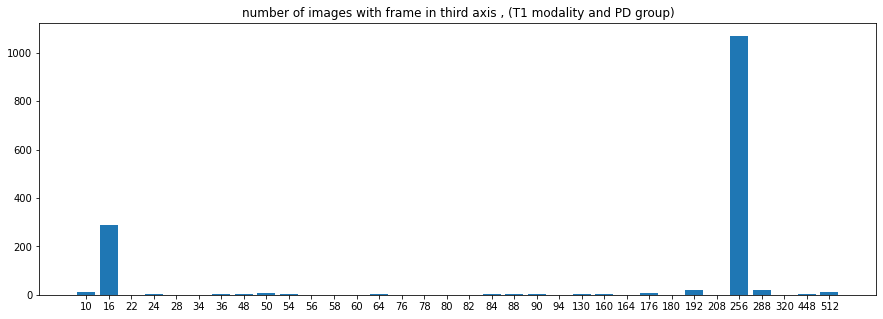

In [101]:
frame_num_count_dic = {}
for index, row in frame_size_df.iterrows():
    frame_num_count_dic[str(row['frame_num'] * 2)] = row['counts']

plt.figure(figsize = (15, 5))    
X_axis = np.arange(len(frame_num_count_dic.keys()))
plt.bar(frame_num_count_dic.keys(), frame_num_count_dic.values()) 
plt.xticks(X_axis, frame_num_count_dic.keys())
plt.title('number of images with frame in third axis , (T1 modality and PD group)')

plt.show()

### processed dataset for the clustring based on the auto encoder

- auto_encoder.py for clustring the T1 images. 
- still need to play with parameters and find the best model to do so 

In [105]:
pd_csv_path = '../CSV_metadata/metadata_PD_2.csv'
PD_df = pd.read_csv(pd_csv_path)

In [106]:
PD_df.head()

,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,weightKg,...,Flip Angle,Acquisition Plane,Matrix X,Matrix Y,Matrix Z,Pixel Spacing X,Pixel Spacing Y,Manufacturer,Mfg Model,Field Strength
0,34,PD,100001,Baseline,168485,1047642,M,67.38,Y,87.0,...,120,SAGITTAL,256,256,192,1.00000,1.00000,SIEMENS,Verio,3.0
1,34,PD,100001,Baseline,168485,1047641,M,67.38,Y,87.0,...,120,SAGITTAL,256,256,192,1.00000,1.00000,SIEMENS,Verio,3.0
2,34,PD,100001,Baseline,168485,1047640,M,67.38,Y,87.0,...,20,AXIAL,512,512,5,0.48828,0.48828,SIEMENS,Verio,3.0
3,34,PD,100001,Baseline,168485,1047640,M,67.38,Y,87.0,...,20,CORONAL,512,512,5,0.48828,0.48828,SIEMENS,Verio,3.0
4,34,PD,100001,Baseline,168485,1047640,M,67.38,Y,87.0,...,20,SAGITTAL,512,512,5,0.48828,0.48828,SIEMENS,Verio,3.0


In [107]:
base_path = '/w/246/gzk/PPMI/MRI_PD/PPMI/'

In [109]:
tmp = PD_df.groupby(['seriesIdentifier']).size().reset_index(name='counts')

In [111]:
len(PD_df)

4057

In [113]:
T1_T2_df = PD_df[(PD_df['Weighting'] == 'T1') | (PD_df['Weighting'] == 'T2')]
len(T1_T2_df)

2763

In [114]:
tmp2 = T1_T2_df.groupby(['seriesIdentifier']).size().reset_index(name='counts')

In [115]:
tmp2[tmp2['counts']>1]

,seriesIdentifier,counts
1969,575537,3
1970,575538,3
2170,848752,2
2177,848779,2
2206,871898,2
2249,973640,3
2275,974171,3
2330,1047640,3


In [125]:
T1_T2_df = T1_T2_df.drop(T1_T2_df[T1_T2_df['seriesIdentifier'] == 1047640].index)


In [126]:
tmp2 = T1_T2_df.groupby(['seriesIdentifier']).size().reset_index(name='counts')
tmp2[tmp2['counts']>1]

,seriesIdentifier,counts


In [127]:
cnt = 0
cnt_2 = 0
path_series_dic = {}
for index, row in T1_T2_df.iterrows():
    tmp_root_path = os.path.join(base_path, str(row['subjectIdentifier']), row['description'].replace(' ', '_').replace('/', '_'))
    for path, dir_names, file_names in os.walk(tmp_root_path):
        if len(file_names) > 0:
            for file in file_names:
                if 'ROBEX.nii' in file: ## skull stripping output
#                 if 'FieldCorrection.nii' in file :
                    cnt += 1
                    print(path, file)
                    if str(row['seriesIdentifier']) == path.split('/')[-1][1:]:
                        cnt_2 += 1
                        path_series_dic[row['seriesIdentifier']] = os.path.join(path, file)

/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3D_T2_FLAIR_ND/2020-10-07_13_51_32.0/S1047642 PPMI_100001_MR_3D_T2_FLAIR_ND_br_raw_20210723152821030_171_S1047642_I1473192_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3D_T2_FLAIR/2020-10-07_13_51_32.0/S1047641 PPMI_100001_MR_3D_T2_FLAIR__br_raw_20210723152845317_80_S1047641_I1473191_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_MT/2020-10-07_13_51_32.0/S1047633 PPMI_100001_MR_AX_T2_GRE_MT_br_raw_20210723153616087_10_S1047633_I1473181_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_MT/2020-10-07_13_51_32.0/S1047639 PPMI_100001_MR_AX_T2_GRE_MT_br_raw_20210723153744746_15_S1047639_I1473187_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_MT/2020-10-07_13_51_32.0/S1047634 PPMI_100001_MR_AX_T2_GRE_MT_br_raw_20210723154146082_5_S1047634_I1473182_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_MT/2020-10-07_13_51_32.0/S1047630 PPMI_100001_MR_AX_T2_GRE_MT_br_raw_20210723153748321_16_S1047630_I1473178_ROBEX.nii
/w/246/gzk/PPMI/MRI

/w/246/gzk/PPMI/MRI_PD/PPMI/100878/3D_T2_FLAIR/2021-03-23_09_05_05.0/S1063509 PPMI_100878_MR_3D_T2_FLAIR__br_raw_20210916201421147_1_S1063509_I1493036_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100891/2D_GRE-MT/2021-04-07_08_03_58.0/S1067321 PPMI_100891_MR_2D_GRE-MT__br_raw_20210928213657598_3_S1067321_I1497622_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100891/2D_GRE-MT/2021-04-07_08_03_58.0/S1067319 PPMI_100891_MR_2D_GRE-MT__br_raw_20210928213616404_1_S1067319_I1497620_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100891/2D_GRE-MT/2021-04-07_08_03_58.0/S1067317 PPMI_100891_MR_2D_GRE-MT__br_raw_20210928213606674_11_S1067317_I1497618_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100891/2D_GRE-MT/2021-04-07_08_03_58.0/S1067320 PPMI_100891_MR_2D_GRE-MT__br_raw_20210928213636086_4_S1067320_I1497621_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100891/2D_GRE-MT/2021-04-07_08_03_58.0/S1067318 PPMI_100891_MR_2D_GRE-MT__br_raw_20210928213611529_14_S1067318_I1497619_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/100891/2D_GRE-MT/2021-04

/w/246/gzk/PPMI/MRI_PD/PPMI/101048/AX_T2_GRE_MT/2021-04-07_09_57_01.0/S1065848 PPMI_101048_MR_AX_T2_GRE_MT_br_raw_20210923220432915_9_S1065848_I1495864_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101048/AX_T2_GRE_MT/2021-04-07_09_57_01.0/S1065842 PPMI_101048_MR_AX_T2_GRE_MT_br_raw_20210923220442056_15_S1065842_I1495858_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101048/AX_T2_GRE_MT/2021-04-07_09_57_01.0/S1065845 PPMI_101048_MR_AX_T2_GRE_MT_br_raw_20210923220430664_7_S1065845_I1495861_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101048/AX_T2_GRE_MT/2021-04-07_09_57_01.0/S1065846 PPMI_101048_MR_AX_T2_GRE_MT_br_raw_20210923220440579_11_S1065846_I1495862_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101048/AX_T2_GRE_MT/2021-04-07_09_57_01.0/S1065844 PPMI_101048_MR_AX_T2_GRE_MT_br_raw_20210923220436489_11_S1065844_I1495860_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101048/AX_T2_GRE_MT/2021-04-07_09_57_01.0/S1065843 PPMI_101048_MR_AX_T2_GRE_MT_br_raw_20210923220445154_5_S1065843_I1495859_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PP

/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065858 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222938917_11_S1065858_I1495874_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065860 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222938266_7_S1065860_I1495876_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065865 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222921228_13_S1065865_I1495881_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065857 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222937882_11_S1065857_I1495873_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065862 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222929209_1_S1065862_I1495878_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/101513/AX_T2_GRE_MT/2021-05-10_09_11_51.0/S1065866 PPMI_101513_MR_AX_T2_GRE_MT_br_raw_20210923222919241_12_S1065866_I1495882_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/P

/w/246/gzk/PPMI/MRI_PD/PPMI/102053/2D_GRE-MT/2021-07-27_07_20_25.0/S1065903 PPMI_102053_MR_2D_GRE-MT__br_raw_20210923234200334_14_S1065903_I1495919_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/102053/2D_GRE-MT/2021-07-27_07_20_25.0/S1065901 PPMI_102053_MR_2D_GRE-MT__br_raw_20210923234200467_14_S1065901_I1495917_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/102053/2D_GRE-MT/2021-07-27_07_20_25.0/S1065902 PPMI_102053_MR_2D_GRE-MT__br_raw_20210923234208955_10_S1065902_I1495918_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/102053/2D_GRE-MT/2021-07-27_07_20_25.0/S1065899 PPMI_102053_MR_2D_GRE-MT__br_raw_20210923234159216_4_S1065899_I1495915_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/102053/2D_GRE-MT/2021-07-27_07_20_25.0/S1065900 PPMI_102053_MR_2D_GRE-MT__br_raw_20210923234158533_16_S1065900_I1495916_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/102053/2D_GRE-MT/2021-07-27_07_20_25.0/S1065903 PPMI_102053_MR_2D_GRE-MT__br_raw_20210923234200334_14_S1065903_I1495919_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/102053/2D_GRE-MT/2021-07-

/w/246/gzk/PPMI/MRI_PD/PPMI/3078/Cor_FLAIR_TI_2800ms/2012-04-23_16_11_37.0/S148897 PPMI_3078_MR_Cor_FLAIR_TI_2800ms__br_raw_20120502102154135_24_S148897_I301410_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3078/SAG_3D_T1/2012-04-23_16_11_37.0/S148898 PPMI_3078_MR_SAG_3D_T1__br_raw_20120502102154276_122_S148898_I301412_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3080/AX_DUAL_TSE/2012-07-05_12_52_59.0/S183561 PPMI_3080_MR_AX_DUAL_TSE__br_raw_20130304081046134_18_S183561_I361859_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3080/AX_DUAL_TSE/2012-07-05_12_52_59.0/S183561 PPMI_3080_MR_AX_DUAL_TSE__br_raw_20130304081044278_7_S183561_I361856_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3080/Cor_FLAIR_TI_2800ms/2012-07-05_12_52_59.0/S183563 PPMI_3080_MR_Cor_FLAIR_TI_2800ms__br_raw_20130304081038677_20_S183563_I361858_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3080/SAG_3D_T1/2012-07-05_12_52_59.0/S183562 PPMI_3080_MR_SAG_3D_T1__br_raw_20130304081051251_148_S183562_I361857_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3081/AX_DUAL_TSE/

/w/246/gzk/PPMI/MRI_PD/PPMI/3120/Axial_PD-T2_TSE/2012-05-09_11_34_12.0/S151214 PPMI_3120_MR_Axial_PD-T2_TSE__br_raw_20120522094921368_55_S151214_I305852_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3120/Axial_PD-T2_TSE/2012-05-09_11_34_12.0/S151214 PPMI_3120_MR_Axial_PD-T2_TSE__br_raw_20120522094842071_44_S151214_I305850_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3120/MPRAGE_GRAPPA2/2016-05-18_11_39_01.0/S467580 PPMI_3120_MR_MPRAGE_GRAPPA2_br_raw_20160617081515117_64_S467580_I738217_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3120/MPRAGE_GRAPPA/2013-04-17_10_25_22.0/S191138 PPMI_3120_MR_MPRAGE_GRAPPA__br_raw_20130603094340156_144_S191138_I374856_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3120/MPRAGE_GRAPPA/2012-05-09_11_34_12.0/S151213 PPMI_3120_MR_MPRAGE_GRAPPA__br_raw_20120522094743040_118_S151213_I305849_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3120/MPRAGE_GRAPPA/2013-04-17_10_25_22.0/S191138 PPMI_3120_MR_MPRAGE_GRAPPA__br_raw_20130603094340156_144_S191138_I374856_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3120/M

/w/246/gzk/PPMI/MRI_PD/PPMI/3134/MPRAGE_GRAPPA2/2017-04-14_12_14_23.0/S606238 PPMI_3134_MR_MPRAGE_GRAPPA2_br_raw_20170907112208180_32_S606238_I901141_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3134/MPRAGE_GRAPPA/2013-04-22_09_22_01.0/S188148 PPMI_3134_MR_MPRAGE_GRAPPA__br_raw_20130429093502983_99_S188148_I369011_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3134/Sag_MPRAGE_GRAPPA/2014-05-07_11_39_24.0/S225582 PPMI_3134_MR_Sag_MPRAGE_GRAPPA__br_raw_20140723122146910_125_S225582_I436350_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3134/Sag_MPRAGE_GRAPPA/2017-04-14_12_14_23.0/S606239 PPMI_3134_MR_Sag_MPRAGE_GRAPPA__br_raw_20170907112207830_133_S606239_I901142_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3134/Sag_MPRAGE_GRAPPA/2014-05-07_11_39_24.0/S225582 PPMI_3134_MR_Sag_MPRAGE_GRAPPA__br_raw_20140723122146910_125_S225582_I436350_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3134/Sag_MPRAGE_GRAPPA/2017-04-14_12_14_23.0/S606239 PPMI_3134_MR_Sag_MPRAGE_GRAPPA__br_raw_20170907112207830_133_S606239_I901142_ROBEX.nii
/w/246/gz

/w/246/gzk/PPMI/MRI_PD/PPMI/3182/Axial_PD-T2-FS_TSE/2014-09-11_11_18_14.0/S234701 PPMI_3182_MR_Axial_PD-T2-FS_TSE_br_raw_20141027102453946_88_S234701_I449552_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3182/Axial_PD-T2-FS_TSE/2014-09-11_11_18_14.0/S234701 PPMI_3182_MR_Axial_PD-T2-FS_TSE_br_raw_20141027102620662_18_S234701_I449551_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3182/Axial_PD-T2_TSE/2013-07-19_11_08_16.0/S203265 PPMI_3182_MR_Axial_PD-T2_TSE__br_raw_20131008135452846_43_S203265_I393611_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3182/Axial_PD-T2_TSE/2013-07-19_11_08_16.0/S203265 PPMI_3182_MR_Axial_PD-T2_TSE__br_raw_20131008135451046_59_S203265_I393612_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3182/Axial_PD-T2_TSE/2012-09-04_12_55_55.0/S167604 PPMI_3182_MR_Axial_PD-T2_TSE__br_raw_20120917113744721_84_S167604_I334542_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3182/Axial_PD-T2_TSE/2012-09-04_12_55_55.0/S167604 PPMI_3182_MR_Axial_PD-T2_TSE__br_raw_20120917113735643_38_S167604_I334549_ROBEX.nii
/w/246/gzk/P

/w/246/gzk/PPMI/MRI_PD/PPMI/3307/Axial_PD-T2_TSE_AC_PC_line/2011-11-10_14_20_09.0/S131502 PPMI_3307_MR_Axial_PD-T2_TSE_AC_PC_line_br_raw_20111201141453205_76_S131502_I269466_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3307/Axial_PD-T2_TSE_AC_PC_line/2013-11-12_13_02_44.0/S212766 PPMI_3307_MR_Axial_PD-T2_TSE_AC_PC_line_br_raw_20140218150546708_100_S212766_I414614_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3307/Axial_PD-T2_TSE_AC_PC_line/2013-11-12_13_02_44.0/S212766 PPMI_3307_MR_Axial_PD-T2_TSE_AC_PC_line_br_raw_20140218150605568_32_S212766_I414616_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3307/Axial_PD-T2_TSE_AC_PC_line/2012-11-06_10_41_17.0/S185693 PPMI_3307_MR_Axial_PD-T2_TSE_AC_PC_line_br_raw_20130402145427033_35_S185693_I365160_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3307/Axial_PD-T2_TSE_AC_PC_line/2012-11-06_10_41_17.0/S185693 PPMI_3307_MR_Axial_PD-T2_TSE_AC_PC_line_br_raw_20130402145429310_72_S185693_I365158_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3307/Axial_PD-T2_TSE_AC_PC_line/2011-11-10_14_20_09

/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2012-05-30_10_04_58.0/S181422 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20130204162846046_47_S181422_I357683_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2015-07-23_11_55_18.0/S277082 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20150921094348900_131_S277082_I515228_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2013-09-12_10_23_17.0/S205640 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20131107155206477_50_S205640_I397591_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2012-05-30_10_04_58.0/S181422 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20130204162846046_47_S181422_I357683_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2015-07-23_11_55_18.0/S277082 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20150921094348900_131_S277082_I515228_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAPPA/2013-09-12_10_23_17.0/S205640 PPMI_3359_MR_MPRAGE_GRAPPA__br_raw_20131107155206477_50_S205640_I397591_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3359/MPRAGE_GRAP

/w/246/gzk/PPMI/MRI_PD/PPMI/3374/MPRAGE_GRAPPA/2012-04-19_09_50_48.0/S148982 PPMI_3374_MR_MPRAGE_GRAPPA__br_raw_20120503085454121_136_S148982_I301538_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3374/MPRAGE_GRAPPA/2013-07-29_10_39_31.0/S203269 PPMI_3374_MR_MPRAGE_GRAPPA__br_raw_20131008140315840_153_S203269_I393616_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3374/MPRAGE_GRAPPA/2016-04-13_09_42_15.0/S426396 PPMI_3374_MR_MPRAGE_GRAPPA__br_raw_20160422145415532_77_S426396_I689594_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3374/MPRAGE_GRAPPA/2014-04-16_09_39_42.0/S221712 PPMI_3374_MR_MPRAGE_GRAPPA__br_raw_20140609134342254_76_S221712_I430166_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3374/MPRAGE_GRAPPA/2012-04-19_09_50_48.0/S148982 PPMI_3374_MR_MPRAGE_GRAPPA__br_raw_20120503085454121_136_S148982_I301538_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3374/MPRAGE_GRAPPA/2013-07-29_10_39_31.0/S203269 PPMI_3374_MR_MPRAGE_GRAPPA__br_raw_20131008140315840_153_S203269_I393616_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3374/MPRAGE_GR

/w/246/gzk/PPMI/MRI_PD/PPMI/3392/MPRAGE_GRAPPA/2015-05-06_08_35_44.0/S264335 PPMI_3392_MR_MPRAGE_GRAPPA__br_raw_20150629104021722_79_S264335_I498927_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3392/MPRAGE_GRAPPA/2014-05-19_09_31_47.0/S225606 PPMI_3392_MR_MPRAGE_GRAPPA__br_raw_20140723130613808_78_S225606_I436387_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3392/MPRAGE_GRAPPA/2013-04-29_10_17_16.0/S189913 PPMI_3392_MR_MPRAGE_GRAPPA__br_raw_20130520110153962_93_S189913_I372992_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3392/MPRAGE_GRAPPA/2017-12-19_09_29_30.0/S689515 PPMI_3392_MR_MPRAGE_GRAPPA__br_raw_20180525112513378_138_S689515_I1002441_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3392/MPRAGE_GRAPPA/2015-05-06_08_35_44.0/S264335 PPMI_3392_MR_MPRAGE_GRAPPA__br_raw_20150629104021722_79_S264335_I498927_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3392/MPRAGE_GRAPPA/2014-05-19_09_31_47.0/S225606 PPMI_3392_MR_MPRAGE_GRAPPA__br_raw_20140723130613808_78_S225606_I436387_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3392/MPRAGE_GRAP

/w/246/gzk/PPMI/MRI_PD/PPMI/3510/T1W_3D_FFE_AX/2011-05-03_09_38_48.0/S190681 PPMI_3510_MR_T1W_3D_FFE_AX__br_raw_20130528150126889_128_S190681_I374085_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3510/T1W_3D_FFE_COR/2011-04-13_09_38_48.0/S990758 PPMI_3510_MR_T1W_3D_FFE_COR_br_raw_20210106095227522_101_S990758_I1396161_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3510/T1_AXIAL/2011-04-13_09_38_48.0/S990756 PPMI_3510_MR_T1_AXIAL_br_raw_20210106095233688_19_S990756_I1396159_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3510/T1_SAG/2011-04-13_09_38_48.0/S990755 PPMI_3510_MR_T1_SAG_br_raw_20210106095235097_9_S990755_I1396158_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3514/FLAIR_LongTR_AX/2011-09-02_12_03_04.0/S124969 PPMI_3514_MR_FLAIR_LongTR_AX__br_raw_20111010154555140_17_S124969_I260383_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3514/MPRAGEadni/2011-09-02_12_03_04.0/S124968 PPMI_3514_MR_MPRAGEadni_br_raw_20111010154614234_63_S124968_I260382_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3516/DUAL_TSE/2011-07-22_13_08_32.0/S19068

/w/246/gzk/PPMI/MRI_PD/PPMI/3567/MPRAGE_GRAPPA/2011-06-01_09_22_09.0/S117837 PPMI_3567_MR_MPRAGE_GRAPPA__br_raw_20110808110001539_42_S117837_I249273_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3567/MPRAGE_GRAPPA/2013-07-09_16_59_40.0/S208408 PPMI_3567_MR_MPRAGE_GRAPPA__br_raw_20131218123853003_27_S208408_I402060_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3567/MPRAGE_GRAPPA/2012-06-25_16_15_22.0/S171176 PPMI_3567_MR_MPRAGE_GRAPPA__br_raw_20121017135559410_35_S171176_I340732_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3567/MPRAGE_GRAPPA/2015-06-29_14_56_08.0/S270432 PPMI_3567_MR_MPRAGE_GRAPPA__br_raw_20150831080815235_115_S270432_I507388_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3567/MPRAGE_GRAPPA/2011-06-01_09_22_09.0/S117837 PPMI_3567_MR_MPRAGE_GRAPPA__br_raw_20110808110001539_42_S117837_I249273_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3567/MPRAGE_GRAPPA/2013-07-09_16_59_40.0/S208408 PPMI_3567_MR_MPRAGE_GRAPPA__br_raw_20131218123853003_27_S208408_I402060_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3567/MPRAGE_GRAPP

/w/246/gzk/PPMI/MRI_PD/PPMI/3591/Axial_PD-T2_TSE_FS/2014-03-10_12_41_45.0/S215740 PPMI_3591_MR_Axial_PD-T2_TSE_FS_br_raw_20140408115257888_74_S215740_I419366_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/Axial_PD-T2_TSE_FS/2014-03-10_12_41_45.0/S215740 PPMI_3591_MR_Axial_PD-T2_TSE_FS_br_raw_20140408115353304_18_S215740_I419367_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/Axial_PD-T2_TSE_FS/2017-03-13_09_13_33.0/S575486 PPMI_3591_MR_AXIAL_PD-T2_TSE_FS_br_raw_20170627144337278_43_S575486_I864625_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/Axial_PD-T2_TSE_FS/2017-03-13_09_13_33.0/S575486 PPMI_3591_MR_AXIAL_PD-T2_TSE_FS_br_raw_20170627144336393_62_S575486_I864624_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/Axial_PD-T2_TSE_FS/2013-03-08_14_49_20.0/S189929 PPMI_3591_MR_Axial_PD-T2_TSE_FS_br_raw_20130520113343278_33_S189929_I373017_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3591/Axial_PD-T2_TSE_FS/2013-03-08_14_49_20.0/S189929 PPMI_3591_MR_Axial_PD-T2_TSE_FS_br_raw_20130520113323872_85_S189929_I373011_RO

/w/246/gzk/PPMI/MRI_PD/PPMI/3666/SAG_T1_3DMPRAGE/2013-03-14_13_27_56.0/S187844 PPMI_3666_MR_SAG_T1_3DMPRAGE__br_raw_20130424113847828_87_S187844_I368592_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3700/sT1W_3D_TFE/2012-07-31_15_57_23.0/S186548 PPMI_3700_MR_sT1W_3D_TFE__br_raw_20130410125211500_63_S186548_I366325_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3700/T2W_FLAIR/2012-07-31_15_57_23.0/S186550 PPMI_3700_MR_T2W_FLAIR__br_raw_20130410125216586_17_S186550_I366327_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3700/T2W_TSE/2012-07-31_15_57_23.0/S186549 PPMI_3700_MR_T2W_TSE__br_raw_20130410125209410_3_S186549_I366326_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3701/DUAL_TSE/2012-08-02_16_58_45.0/S228530 PPMI_3701_MR_DUAL_TSE_br_raw_20140825111112932_29_S228530_I440680_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3701/DUAL_TSE/2012-08-02_16_58_45.0/S228530 PPMI_3701_MR_DUAL_TSE_br_raw_20140825111114276_28_S228530_I440679_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3701/T2W_FLAIR/2012-08-02_16_58_45.0/S228529 PPMI_3701_MR_T2W

/w/246/gzk/PPMI/MRI_PD/PPMI/3775/MPRAGE_GRAPPA_ADNI/2016-06-15_10_44_55.0/S484613 PPMI_3775_MR_MPRAGE_GRAPPA_ADNI_br_raw_20160714172230101_24_S484613_I757814_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3775/MPRAGE_GRAPPA/2013-05-29_10_09_28.0/S196305 PPMI_3775_MR_MPRAGE_GRAPPA__br_raw_20130724161247957_158_S196305_I382304_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3775/MPRAGE_GRAPPA/2016-06-15_10_44_55.0/S484614 PPMI_3775_MR_MPRAGE_GRAPPA__br_raw_20160714172207929_1_S484614_I757816_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3775/MPRAGE_GRAPPA/2012-05-30_10_25_16.0/S169367 PPMI_3775_MR_MPRAGE_GRAPPA__br_raw_20121002101000141_166_S169367_I337731_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3775/MPRAGE_GRAPPA/2014-05-21_08_44_37.0/S228195 PPMI_3775_MR_MPRAGE_GRAPPA__br_raw_20140820162807977_17_S228195_I440215_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3775/MPRAGE_GRAPPA/2013-05-29_10_09_28.0/S196305 PPMI_3775_MR_MPRAGE_GRAPPA__br_raw_20130724161247957_158_S196305_I382304_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3775/MP

/w/246/gzk/PPMI/MRI_PD/PPMI/3808/Axial_PD-T2_TSE_FS/2015-08-25_10_40_34.0/S277090 PPMI_3808_MR_Axial_PD-T2_TSE_FS_br_raw_20150921100603933_72_S277090_I515238_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3808/Axial_PD-T2_TSE_FS/2013-11-19_10_55_23.0/S208421 PPMI_3808_MR_Axial_PD-T2_TSE_FS_br_raw_20131218125843069_78_S208421_I402075_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3808/Axial_PD-T2_TSE_FS/2013-11-19_10_55_23.0/S208421 PPMI_3808_MR_Axial_PD-T2_TSE_FS_br_raw_20131218125904784_31_S208421_I402076_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3808/Axial_PD-T2_TSE_FS/2015-08-25_10_40_34.0/S277090 PPMI_3808_MR_Axial_PD-T2_TSE_FS_br_raw_20150921100619127_27_S277090_I515241_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3808/Axial_PD-T2_TSE_FS/2015-08-25_10_40_34.0/S277090 PPMI_3808_MR_Axial_PD-T2_TSE_FS_br_raw_20150921100603933_72_S277090_I515238_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3808/Axial_PD-T2_TSE_FS/2013-11-19_10_55_23.0/S208421 PPMI_3808_MR_Axial_PD-T2_TSE_FS_br_raw_20131218125843069_78_S208421_I402075_RO

/w/246/gzk/PPMI/MRI_PD/PPMI/3826/MPRAGE_GRAPPA/2014-08-12_10_41_02.0/S234762 PPMI_3826_MR_MPRAGE_GRAPPA__br_raw_20141027115437587_100_S234762_I449627_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3826/MPRAGE_GRAPPA/2013-08-20_11_09_50.0/S204634 PPMI_3826_MR_MPRAGE_GRAPPA__br_raw_20131023090610512_100_S204634_I395598_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3826/MPRAGE_GRAPPA/2012-08-21_11_21_27.0/S171126 PPMI_3826_MR_MPRAGE_GRAPPA__br_raw_20121017110359997_46_S171126_I340666_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3826/MPRAGE_GRAPPA/2016-10-11_10_32_59.0/S526774 PPMI_3826_MR_MPRAGE_GRAPPA__br_raw_20170111141631114_126_S526774_I808175_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3826/MPRAGE_GRAPPA/2014-08-12_10_41_02.0/S234762 PPMI_3826_MR_MPRAGE_GRAPPA__br_raw_20141027115437587_100_S234762_I449627_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3826/MPRAGE_GRAPPA/2013-08-20_11_09_50.0/S204634 PPMI_3826_MR_MPRAGE_GRAPPA__br_raw_20131023090610512_100_S204634_I395598_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3826/MPRAGE_G

/w/246/gzk/PPMI/MRI_PD/PPMI/3858/DTI_gated/2011-09-05_09_09_23.0/S193644 PPMI_3858_MR_DTI_gated__br_raw_20130628095906630_1_S193644_I378560_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3858/DTI_gated/2011-09-05_09_09_23.0/S193645 PPMI_3858_MR_DTI_gated__br_raw_20130628095835617_1_S193645_I378561_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3858/DTI_gated/2011-09-05_09_09_23.0/S193644 PPMI_3858_MR_DTI_gated__br_raw_20130628095906630_1_S193644_I378560_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3858/DTI_gated/2011-09-05_09_09_23.0/S193645 PPMI_3858_MR_DTI_gated__br_raw_20130628095835617_1_S193645_I378561_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3858/MPRAGE_GRAPPA/2011-09-05_09_09_23.0/S193642 PPMI_3858_MR_MPRAGE_GRAPPA__br_raw_20130628095753091_45_S193642_I378558_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3863/Axial_PD-T2_TSE_FS/2013-03-22_08_17_07.0/S205756 PPMI_3863_MR_Axial_PD-T2_TSE_FS_br_raw_20131108094225029_90_S205756_I397767_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/3863/Axial_PD-T2_TSE_FS/2013-03-22_08_17_07.0

/w/246/gzk/PPMI/MRI_PD/PPMI/4011/Axial_PD-T2_TSE_FS/2012-12-06_11_17_43.0/S208540 PPMI_4011_MR_Axial_PD-T2_TSE_FS_br_raw_20131218153931681_36_S208540_I402288_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/Axial_PD-T2_TSE_FS/2012-12-06_11_17_43.0/S208540 PPMI_4011_MR_Axial_PD-T2_TSE_FS_br_raw_20131218153858454_105_S208540_I402284_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/Axial_PD-T2_TSE_FS/2016-02-11_10_55_58.0/S446253 PPMI_4011_MR_AXIAL_PD-T2_TSE_FS_br_raw_20160523175614956_79_S446253_I713701_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/Axial_PD-T2_TSE_FS/2016-02-11_10_55_58.0/S446253 PPMI_4011_MR_AXIAL_PD-T2_TSE_FS_br_raw_20160523175548403_25_S446253_I713702_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/Axial_PD-T2_TSE_FS/2014-01-16_10_02_19.0/S212799 PPMI_4011_MR_Axial_PD-T2_TSE_FS_br_raw_20140218161623923_103_S212799_I414655_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4011/Axial_PD-T2_TSE_FS/2014-01-16_10_02_19.0/S212799 PPMI_4011_MR_Axial_PD-T2_TSE_FS_br_raw_20140218161605693_6_S212799_I414658_R

/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA_ADNI/2016-10-18_14_14_19.0/S606274 PPMI_4029_MR_MPRAGE_GRAPPA_ADNI_br_raw_20170907122420592_110_S606274_I901184_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA_ADNI/2016-10-18_14_14_19.0/S606272 PPMI_4029_MR_MPRAGE_GRAPPA_ADNI_br_raw_20170907122420643_152_S606272_I901182_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA_ADNI/2016-10-18_14_14_19.0/S606274 PPMI_4029_MR_MPRAGE_GRAPPA_ADNI_br_raw_20170907122420592_110_S606274_I901184_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA_ADNI/2016-10-18_14_14_19.0/S606272 PPMI_4029_MR_MPRAGE_GRAPPA_ADNI_br_raw_20170907122420643_152_S606272_I901182_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA/2012-10-18_09_53_10.0/S173512 PPMI_4029_MR_MPRAGE_GRAPPA__br_raw_20121107113132833_97_S173512_I344323_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4029/MPRAGE_GRAPPA/2016-10-18_14_14_19.0/S606273 PPMI_4029_MR_MPRAGE_GRAPPA__br_raw_20170907122420793_106_S606273_I901183_ROBEX.nii
/w/24

/w/246/gzk/PPMI/MRI_PD/PPMI/40533/2D_GRE-MT/2021-07-22_13_17_44.0/S1065620 PPMI_40533_MR_2D_GRE-MT__br_raw_20210923161921811_4_S1065620_I1495568_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40533/2D_GRE-MT/2021-07-22_13_17_44.0/S1065616 PPMI_40533_MR_2D_GRE-MT__br_raw_20210923161924353_15_S1065616_I1495564_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40533/2D_GRE-MT/2021-07-22_13_17_44.0/S1065619 PPMI_40533_MR_2D_GRE-MT__br_raw_20210923161923858_9_S1065619_I1495567_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40533/2D_GRE-MT/2021-07-22_13_17_44.0/S1065617 PPMI_40533_MR_2D_GRE-MT__br_raw_20210923161948269_14_S1065617_I1495565_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40533/3D_T2_FLAIR/2021-07-22_13_17_44.0/S1065625 PPMI_40533_MR_3D_T2_FLAIR__br_raw_20210923161921187_143_S1065625_I1495573_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40533/AXIAL_PD-T2_TSE_FS/2017-06-21_11_14_08.0/S648925 PPMI_40533_MR_AXIAL_PD-T2_TSE_FS_br_raw_20180109122641836_33_S648925_I951729_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/40533/AXIAL_PD-T2_T

/w/246/gzk/PPMI/MRI_PD/PPMI/4081/MPRAGE_GRAPPA2/2017-08-09_11_58_50.0/S648942 PPMI_4081_MR_MPRAGE_GRAPPA2_br_raw_20180109124611224_62_S648942_I951749_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4081/MPRAGE_GRAPPA2/2017-08-09_11_58_50.0/S648941 PPMI_4081_MR_MPRAGE_GRAPPA2_br_raw_20180109124610662_93_S648941_I951748_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4081/MPRAGE_GRAPPA2/2017-08-09_11_58_50.0/S648942 PPMI_4081_MR_MPRAGE_GRAPPA2_br_raw_20180109124611224_62_S648942_I951749_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4081/MPRAGE_GRAPPA2/2017-08-09_11_58_50.0/S648941 PPMI_4081_MR_MPRAGE_GRAPPA2_br_raw_20180109124610662_93_S648941_I951748_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4081/MPRAGE_GRAPPA_ND/2014-02-04_07_43_02.0/S213551 PPMI_4081_MR_MPRAGE_GRAPPA_ND_br_raw_20140303172259691_160_S213551_I415763_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4081/MPRAGE_GRAPPA/2015-02-19_10_43_24.0/S308750 PPMI_4081_MR_MPRAGE_GRAPPA__br_raw_20151116121441202_127_S308750_I554248_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/4081/MP

/w/246/gzk/PPMI/MRI_PD/PPMI/41411/MPRAGE/2014-11-14_15_06_38.0/S244835 PPMI_41411_MR_MPRAGE_br_raw_20150219110524270_6_S244835_I468226_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41411/MPRAGE/2014-10-29_00_00_00.0/S990748 PPMI_41411_MR_MPRAGE_br_raw_20210106083723032_17_S990748_I1396140_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41412/MPRAGE/2014-11-05_15_53_29.0/S244838 PPMI_41412_MR_MPRAGE_br_raw_20150219110810652_150_S244838_I468229_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41420/FLAIR/2014-12-17_16_24_26.0/S249224 PPMI_41420_MR_FLAIR__br_raw_20150219111032805_44_S249224_I473977_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41420/MPRAGE/2014-12-17_16_24_26.0/S249226 PPMI_41420_MR_MPRAGE_br_raw_20150219111044505_82_S249226_I473979_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41438/MPRAGE_SENSE2/2020-02-25_12_30_09.0/S990555 PPMI_41438_MR_MPRAGE_SENSE2__br_raw_20210105160917603_146_S990555_I1395899_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/41486/Axial_PD-T2_TSE_FS/2019-07-02_10_49_51.0/S989242 PPMI_41486_MR_Axial_PD-T

/w/246/gzk/PPMI/MRI_PD/PPMI/50028/Axial_PD-T2_TSE_FS/2014-07-30_09_01_35.0/S254425 PPMI_50028_MR_Axial_PD-T2_TSE_FS_br_raw_20150406134457661_57_S254425_I482343_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50028/Axial_PD-T2_TSE_FS/2014-07-30_09_01_35.0/S234814 PPMI_50028_MR_Axial_PD-T2_TSE_FS_br_raw_20141027131842785_99_S234814_I449700_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50028/Axial_PD-T2_TSE_FS/2014-07-30_09_01_35.0/S234814 PPMI_50028_MR_Axial_PD-T2_TSE_FS_br_raw_20141027131840957_50_S234814_I449699_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50028/Axial_PD-T2_TSE_FS/2016-07-27_10_46_28.0/S493642 PPMI_50028_MR_Axial_PD-T2_TSE_FS_br_raw_20160824143218457_82_S493642_I769310_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50028/Axial_PD-T2_TSE_FS/2016-07-27_10_46_28.0/S493642 PPMI_50028_MR_Axial_PD-T2_TSE_FS_br_raw_20160824143226067_36_S493642_I769305_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/50028/Axial_PD-T2_TSE_FS/2015-10-06_09_17_05.0/S308811 PPMI_50028_MR_Axial_PD-T2_TSE_FS_br_raw_20151116132031912_35_S30881

/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA/2015-11-18_11_24_31.0/S331875 PPMI_52678_MR_Sag_MPRAGE_GRAPPA__br_raw_20151215170020031_113_S331875_I581174_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA/2017-11-09_10_10_22.0/S661408 PPMI_52678_MR_Sag_MPRAGE_GRAPPA__br_raw_20180223121056287_56_S661408_I966929_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA/2020-01-24_11_43_50.0/S968467 PPMI_52678_MR_Sag_MPRAGE_GRAPPA__br_raw_20201020154252028_63_S968467_I1350996_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA/2015-11-18_11_24_31.0/S331875 PPMI_52678_MR_Sag_MPRAGE_GRAPPA__br_raw_20151215170020031_113_S331875_I581174_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA/2017-11-09_10_10_22.0/S661408 PPMI_52678_MR_Sag_MPRAGE_GRAPPA__br_raw_20180223121056287_56_S661408_I966929_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/52678/Sag_MPRAGE_GRAPPA/2020-01-24_11_43_50.0/S968467 PPMI_52678_MR_Sag_MPRAGE_GRAPPA__br_raw_20201020154252028_63_S968467_I

/w/246/gzk/PPMI/MRI_PD/PPMI/58431/T2/2017-03-06_09_35_14.0/S599395 PPMI_58431_MR_T2_br_raw_20170822105304097_41_S599395_I893235_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58431/T2/2017-03-06_09_35_14.0/S599395 PPMI_58431_MR_T2_br_raw_20170822105301523_73_S599395_I893234_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58454/FLAIR/2017-06-29_15_20_00.0/S599397 PPMI_58454_MR_FLAIR__br_raw_20170822105416711_37_S599397_I893237_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58454/T1/2017-06-29_15_20_00.0/S599398 PPMI_58454_MR_T1_br_raw_20170822105414932_60_S599398_I893238_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58510/3D_T2_SAG_FLAIR_ND/2021-07-26_14_52_31.0/S1061449 PPMI_58510_MR_3D_T2_SAG_FLAIR_ND_br_raw_20210912022801931_111_S1061449_I1490558_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58510/3D_T2_SAG_FLAIR_ND/2021-07-26_14_52_31.0/S1061446 PPMI_58510_MR_3D_T2_SAG_FLAIR_ND_br_raw_20210912022803166_24_S1061446_I1490555_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/58510/3D_T2_SAG_FLAIR_ND/2021-07-26_14_52_31.0/S1061449 PPMI_58510

/w/246/gzk/PPMI/MRI_PD/PPMI/73673/Cor_FLAIR_TI_2800ms/2018-09-12_12_09_04.0/S975506 PPMI_73673_MR_Cor_FLAIR_TI_2800ms__br_raw_20201112092902825_30_S975506_I1366622_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/73673/T1/2018-09-12_12_09_04.0/S975507 PPMI_73673_MR_T1_br_raw_20201112092819346_164_S975507_I1366623_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/73935/Accelerated_Sag_IR-FSPGR/2018-11-08_13_31_30.0/S848674 PPMI_73935_MR_Accelerated_Sag_IR-FSPGR_br_raw_20190808144209508_47_S848674_I1196687_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/73935/Axial_FLAIR/2018-11-08_13_31_30.0/S848673 PPMI_73935_MR_Axial_FLAIR__br_raw_20190808144214402_1_S848673_I1196686_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/74034/T2/2018-04-26_14_48_23.0/S788551 PPMI_74034_MR_T2_br_raw_20190204111158262_20_S788551_I1120663_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/74034/T2/2018-04-26_14_48_23.0/S788551 PPMI_74034_MR_T2_br_raw_20190204111157854_77_S788551_I1120662_ROBEX.nii
/w/246/gzk/PPMI/MRI_PD/PPMI/74067/3D_T2_FLAIR_ND/2020-11-04_14_39_45

In [129]:
len(T1_T2_df)

2742

In [132]:
def return_path(row):
#     if row['seriesIdentifier'] in left_out:
#         return 'no_path'
    if row['seriesIdentifier'] not in path_series_dic.keys():
        return 'khar'
    return path_series_dic[row['seriesIdentifier']]

In [133]:
T1_T2_df['preprocessed_2_path'] = T1_T2_df.apply (lambda row: return_path(row), axis=1)

In [135]:
# T1_T2_df[T1_T2_df['preprocessed_2_path'] == 'khar']
T1_T2_df = T1_T2_df.drop(T1_T2_df[T1_T2_df['preprocessed_2_path'] == 'khar'].index)


In [136]:
len(T1_T2_df)

2665

In [137]:
T1_T2_df.to_csv('T1_T2_PDSubjects_preprocessed_2_csv_info.csv', index=False)

In [3]:
T1_T2_df = pd.read_csv('T1_T2_PDSubjects_preprocessed_2_csv_info.csv')

In [8]:
len(set(T1_T2_df['seriesIdentifier'].tolist()))

2665

In [18]:
len(T1_T2_df[T1_T2_df['Weighting'] == 'T2'])

1184

In [9]:
weight_series_dic = {}
for index, row in T1_T2_df.iterrows():
    weight_series_dic[row['seriesIdentifier']] = row['Weighting']

In [34]:
len(set(weight_series_dic))

2665

In [14]:
###shuffle values to devide them to train, test, val
import random

keys = list(weight_series_dic.keys())
random.shuffle(keys)

shuffled_weight_series_dic = dict()
for key in keys:
    shuffled_weight_series_dic.update({key: weight_series_dic[key]})


In [35]:
len(shuffled_weight_series_dic)

2665

In [19]:
### 1481 T1,  1037, 296, 148
### 1184 T2,  829, 237, 118

In [33]:
len(mode_series_identifier_dic)

2466

In [36]:
mode_series_identifier_dic = {}
t1_cnt = 0
t2_cnt = 0
for key, value in shuffled_weight_series_dic.items():
    if value == 'T1':
        if t1_cnt < 1037 :
            mode_series_identifier_dic[key] = 'train'
            print('T1, train, {}'.format(t1_cnt))
#             t1_cnt += 1
        if (t1_cnt >= 1037) and (t1_cnt < (1037 + 296)):
            mode_series_identifier_dic[key] = 'val'
            print('T1, val, {}'.format(t1_cnt))
#             t1_cnt +=1
        if t1_cnt >= (1037 + 296):
            mode_series_identifier_dic[key] = 'test'
            print('T1, test, {}'.format(t1_cnt))
        
        t1_cnt +=1
        
    if value == 'T2':
        if t2_cnt < 829 :
            mode_series_identifier_dic[key] = 'train'
            print('T2, train, {}'.format(t2_cnt))
        if (t2_cnt >= 829) and (t2_cnt < (829 + 237)):
            mode_series_identifier_dic[key] = 'val'
            print('T2, val, {}'.format(t2_cnt))
        if t2_cnt >= (829 + 237):
            mode_series_identifier_dic[key] = 'test'
            print('T2, test, {}'.format(t2_cnt))
        
        t2_cnt +=1
        

T2, train, 0
T2, train, 1
T1, train, 0
T1, train, 1
T2, train, 2
T1, train, 2
T1, train, 3
T1, train, 4
T1, train, 5
T1, train, 6
T1, train, 7
T1, train, 8
T2, train, 3
T1, train, 9
T2, train, 4
T1, train, 10
T2, train, 5
T2, train, 6
T2, train, 7
T1, train, 11
T1, train, 12
T1, train, 13
T2, train, 8
T1, train, 14
T2, train, 9
T1, train, 15
T1, train, 16
T1, train, 17
T1, train, 18
T1, train, 19
T2, train, 10
T1, train, 20
T2, train, 11
T2, train, 12
T1, train, 21
T1, train, 22
T1, train, 23
T1, train, 24
T1, train, 25
T1, train, 26
T1, train, 27
T1, train, 28
T2, train, 13
T1, train, 29
T1, train, 30
T1, train, 31
T1, train, 32
T1, train, 33
T2, train, 14
T1, train, 34
T2, train, 15
T1, train, 35
T1, train, 36
T1, train, 37
T2, train, 16
T1, train, 38
T1, train, 39
T1, train, 40
T2, train, 17
T1, train, 41
T2, train, 18
T1, train, 42
T1, train, 43
T2, train, 19
T1, train, 44
T2, train, 20
T1, train, 45
T1, train, 46
T1, train, 47
T1, train, 48
T2, train, 21
T1, train, 49
T1, train, 5

T1, val, 1084
T1, val, 1085
T1, val, 1086
T1, val, 1087
T2, val, 873
T1, val, 1088
T1, val, 1089
T2, val, 874
T1, val, 1090
T2, val, 875
T1, val, 1091
T1, val, 1092
T1, val, 1093
T1, val, 1094
T2, val, 876
T1, val, 1095
T1, val, 1096
T1, val, 1097
T1, val, 1098
T2, val, 877
T2, val, 878
T1, val, 1099
T1, val, 1100
T1, val, 1101
T2, val, 879
T1, val, 1102
T2, val, 880
T1, val, 1103
T1, val, 1104
T2, val, 881
T1, val, 1105
T1, val, 1106
T2, val, 882
T1, val, 1107
T1, val, 1108
T1, val, 1109
T1, val, 1110
T1, val, 1111
T1, val, 1112
T1, val, 1113
T1, val, 1114
T2, val, 883
T1, val, 1115
T1, val, 1116
T2, val, 884
T1, val, 1117
T1, val, 1118
T2, val, 885
T2, val, 886
T2, val, 887
T2, val, 888
T1, val, 1119
T1, val, 1120
T1, val, 1121
T1, val, 1122
T2, val, 889
T2, val, 890
T1, val, 1123
T2, val, 891
T1, val, 1124
T1, val, 1125
T1, val, 1126
T1, val, 1127
T1, val, 1128
T2, val, 892
T2, val, 893
T1, val, 1129
T2, val, 894
T1, val, 1130
T1, val, 1131
T2, val, 895
T1, val, 1132
T1, val, 1133
T

In [42]:
def return_mode(row):
    return mode_series_identifier_dic[row['seriesIdentifier']]

In [43]:
T1_T2_df['mode'] = T1_T2_df.apply (lambda row: return_mode(row), axis=1)
T1_T2_df.head()

,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,weightKg,...,Matrix X,Matrix Y,Matrix Z,Pixel Spacing X,Pixel Spacing Y,Manufacturer,Mfg Model,Field Strength,preprocessed_2_path,mode
0,34,PD,100001,Baseline,168485,1047642,M,67.38,Y,87.0,...,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3D_T2_FLAIR...,train
1,34,PD,100001,Baseline,168485,1047641,M,67.38,Y,87.0,...,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3D_T2_FLAIR...,train
2,34,PD,100001,Baseline,168485,1047630,M,67.38,Y,87.0,...,448,448,16,0.5,0.5,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_M...,train
3,34,PD,100001,Baseline,168485,1047631,M,67.38,Y,87.0,...,448,448,16,0.5,0.5,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_M...,train
4,34,PD,100001,Baseline,168485,1047632,M,67.38,Y,87.0,...,448,448,16,0.5,0.5,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_M...,train


In [44]:
T1_T2_df.to_csv('T1_T2_pdSubject_mode_preprocessed2_path.csv', index=False)

In [45]:
import imageio
import pandas as pd 
import numpy as np
import nibabel as nb
import os
import matplotlib.pyplot as plt
from PIL import Image

In [67]:
def intensity_normalization(raw):
    tmp = (raw - np.mean(raw)) / np.std(raw)
    tmp_min = np.min(tmp)
    tmp_max = np.max(tmp)
    result = (tmp - tmp_min) / (tmp_max-tmp_min) * 255
    
    return result.astype(np.uint8)

def image_padding(raw):
    shape = raw.shape
    marginal = np.zeros((256, 256, 256))
    idx_0 = int((256 - shape[0]) / 2.0)
    idx_1 = int((256 - shape[1]) / 2.0)
    idx_2 = int((256 - shape[2]) / 2.0)

    marginal[idx_0 : idx_0 + shape[0], idx_1: idx_1 + shape[1], idx_2: idx_2 + shape[2] ] = raw
    return marginal

In [68]:
base_path = '/w/284/gzk/result/T1_T2_jpegs'
jpeg_csv_path = '/w/246/gzk/PPMI/codes/T1_T2_pdsubject_jpeg_info.csv'

In [50]:
t1_t2_shapes = []
for idx, row in T1_T2_df.iterrows():
    try:
        full_brain_data = nb.load(row['preprocessed_2_path']).get_data()
        t1_t2_shapes.append(full_brain_data.shape)
    except:
        print(row['seriesIdentifier'])
    

/tmp/ipykernel_12311/3495064148.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  full_brain_data = nb.load(row['preprocessed_2_path']).get_data()


157147


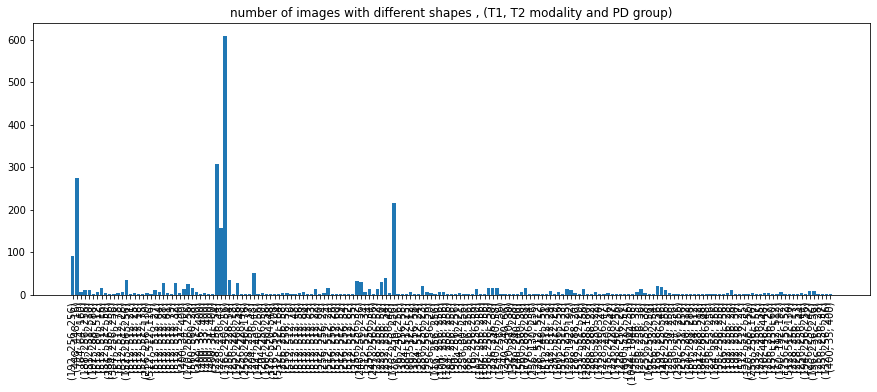

In [55]:
from collections import Counter
a = dict(Counter(t1_t2_shapes))

plt.figure(figsize = (15, 5))    
X_axis = np.arange(len(a.keys()))
plt.bar(list(map(str, a.keys())), a.values()) 
plt.xticks(X_axis, a.keys(), rotation=90)
plt.title('number of images with different shapes , (T1, T2 modality and PD group)')

plt.show()

In [56]:
to_keep = {}
for item in a:
    if a[item] > 50 :
        to_keep[item] = a[item]

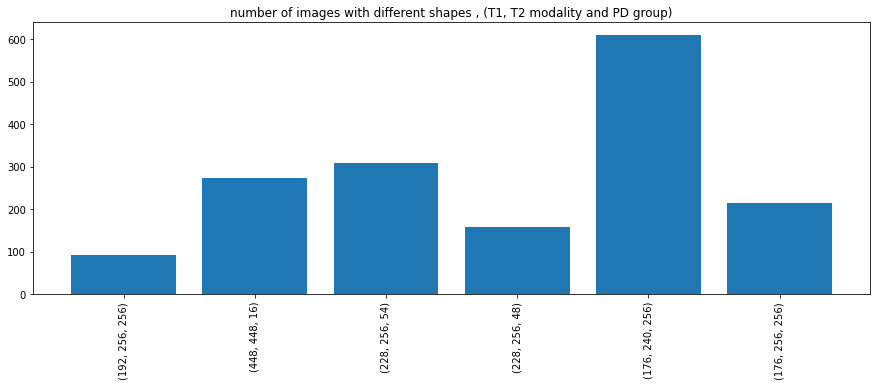

In [57]:
plt.figure(figsize = (15, 5))    
X_axis = np.arange(len(to_keep.keys()))
plt.bar(list(map(str, to_keep.keys())), to_keep.values()) 
plt.xticks(X_axis, to_keep.keys(), rotation=90)
plt.title('number of images with different shapes , (T1, T2 modality and PD group)')


plt.show()

In [60]:
to_keep = {}
for item in a:
    if item[2] == 256 and item[1] >= 240:
        to_keep[item] = a[item]

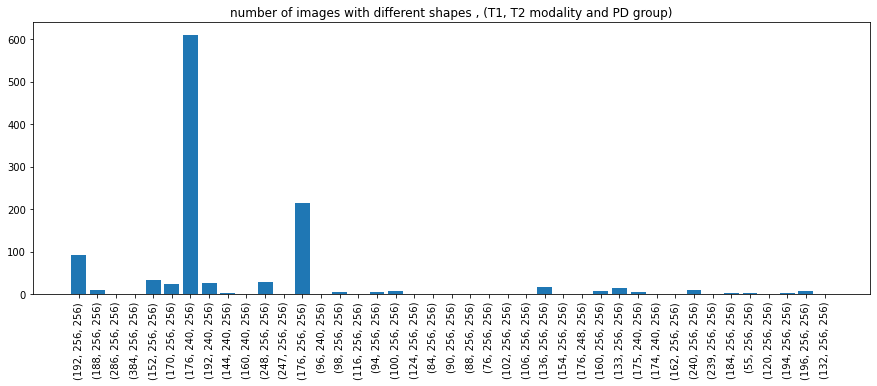

In [61]:
plt.figure(figsize = (15, 5))    
X_axis = np.arange(len(to_keep.keys()))
plt.bar(list(map(str, to_keep.keys())), to_keep.values()) 
plt.xticks(X_axis, to_keep.keys(), rotation=90)
plt.title('number of images with different shapes , (T1, T2 modality and PD group)')


plt.show()

In [74]:
with open(jpeg_csv_path, 'w') as f:
    f.write("seriesIdentifier,Weighting,mode,preprocessed_2_path_jpeg,frame_num\n")

In [77]:
print(len(T1_T2_df))

2665


In [78]:
for idx, row in T1_T2_df.iterrows():
    try:
        full_brain_data = nb.load(row['preprocessed_2_path']).get_data()
    except:
        print(row['seriesIdentifier'])
    
    if full_brain_data.shape[2] != 256 or full_brain_data.shape[1] < 240: ### to avoid biasing the model with different view of the image acuisition
        continue
    if full_brain_data.shape[0] > 256 or full_brain_data.shape[0] < 100:
        continue
    
    full_brain_data = image_padding(full_brain_data)
    full_brain_data = intensity_normalization(full_brain_data)
    
    jpeg_folder = os.path.join(base_path, str(row['seriesIdentifier']))
    if not os.path.exists(jpeg_folder):
        os.mkdir(jpeg_folder)

    for i in range(full_brain_data.shape[2]):
        img = full_brain_data[:, :, i]
        if np.sum(img) == 0:
            continue
        
        jpeg_path = os.path.join(jpeg_folder, "{}.jpg".format(i))
        imageio.imwrite(jpeg_path, img)
        with open(jpeg_csv_path, 'a') as f:
            f.write("{},{},{},{},{}\n".format(row['seriesIdentifier'], row['Weighting'], row['mode'], jpeg_path, i))


/tmp/ipykernel_12311/4067574749.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  full_brain_data = nb.load(row['preprocessed_2_path']).get_data()


157147


In [79]:
cnt = 0
for idx, row in T1_T2_df.iterrows():
    try:
        full_brain_data = nb.load(row['preprocessed_2_path']).get_data()
    except:
        print(row['seriesIdentifier'])
    
    if full_brain_data.shape[2] != 256 or full_brain_data.shape[1] < 240: ### to avoid biasing the model with different view of the image acuisition
        continue
    if full_brain_data.shape[0] > 256 or full_brain_data.shape[0] < 100:
        continue
    cnt += 1
print(cnt)

/tmp/ipykernel_12311/1048660104.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  full_brain_data = nb.load(row['preprocessed_2_path']).get_data()


157147
1126


In [2]:
T1_T2_df_path = 'T1_T2_pdSubject_mode_preprocessed2_path.csv'
T1_T2_df = pd.read_csv(T1_T2_df_path)
T1_T2_df.head()

,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,weightKg,...,Matrix X,Matrix Y,Matrix Z,Pixel Spacing X,Pixel Spacing Y,Manufacturer,Mfg Model,Field Strength,preprocessed_2_path,mode
0,34,PD,100001,Baseline,168485,1047642,M,67.38,Y,87.0,...,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3D_T2_FLAIR...,train
1,34,PD,100001,Baseline,168485,1047641,M,67.38,Y,87.0,...,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3D_T2_FLAIR...,train
2,34,PD,100001,Baseline,168485,1047630,M,67.38,Y,87.0,...,448,448,16,0.5,0.5,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_M...,train
3,34,PD,100001,Baseline,168485,1047631,M,67.38,Y,87.0,...,448,448,16,0.5,0.5,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_M...,train
4,34,PD,100001,Baseline,168485,1047632,M,67.38,Y,87.0,...,448,448,16,0.5,0.5,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/100001/AX_T2_GRE_M...,train


In [5]:
cnt = 0
t1_cnt = 0
t2_cnt = 0
skip_series_identifier = []
for idx, row in T1_T2_df.iterrows():
    try:
        full_brain_data = nb.load(row['preprocessed_2_path']).get_data()
    except:
        print(row['seriesIdentifier'])
    
    if full_brain_data.shape[2] != 256 or full_brain_data.shape[1] < 240: ### to avoid biasing the model with different view of the image acuisition
        skip_series_identifier.append(row['seriesIdentifier'])
        continue
    if full_brain_data.shape[0] > 256 or full_brain_data.shape[0] < 100:
        skip_series_identifier.append(row['seriesIdentifier'])
        continue
    if row['Weighting'] == 'T1':
        t1_cnt +=1
    if row['Weighting'] == 'T2':
        t2_cnt +=1
    cnt += 1
print(cnt)

/tmp/ipykernel_91458/2513888227.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  full_brain_data = nb.load(row['preprocessed_2_path']).get_data()


157147
1126


In [4]:
### distribution of T1 vs T2 in T1 T2 classification after the shape filtering
print(t1_cnt, t2_cnt)

1047 79


In [6]:
len(skip_series_identifier)

1539

In [7]:
shape_filtered_T1_T2 = T1_T2_df[~T1_T2_df['seriesIdentifier'].isin(skip_series_identifier)]

In [21]:
T1_T2_sequences_df = shape_filtered_T1_T2.groupby(['Weighting', 'Pulse Sequence']).size().reset_index(name='counts')
T1_T2_sequences_df

,Weighting,Pulse Sequence,counts
0,T1,GR,159
1,T1,GR/GR/GR/GR/GR,8
2,T1,GR/IR,876
3,T1,RM,3
4,T2,IR/IR/IR/IR/IR,8
5,T2,SE/IR,70


In [75]:
len(shape_filtered_T1_T2)
shape_filtered_T1_T2.head()
shape_filtered_T1_T2.to_csv('T1_T2_path_of_step2_included.csv', index=False)

In [76]:
len(shape_filtered_T1_T2)

1126

In [9]:
selected_T1 = shape_filtered_T1_T2[shape_filtered_T1_T2['Weighting'] == 'T1']
len(selected_T1)

1047

In [11]:
len(selected_T1['seriesIdentifier'].unique())

1047

In [16]:
print(len(selected_T1[selected_T1['mode'] == 'train']))
print(len(selected_T1[selected_T1['mode'] == 'test']))
print(len(selected_T1[selected_T1['mode'] == 'val']))


724
105
218


In [17]:
selected_T1.keys()

Index(['siteKey', 'researchGroup', 'subjectIdentifier', 'visitIdentifier',
       'studyIdentifier', 'seriesIdentifier', 'subjectSex', 'subjectAge',
       'ageQualifier', 'weightKg', 'dateAcquired', 'imageUID', 'description',
       'Acquisition Type', 'Weighting', 'Pulse Sequence', 'Slice Thickness',
       'TE', 'TR', 'TI', 'Coil', 'Flip Angle', 'Acquisition Plane', 'Matrix X',
       'Matrix Y', 'Matrix Z', 'Pixel Spacing X', 'Pixel Spacing Y',
       'Manufacturer', 'Mfg Model', 'Field Strength', 'preprocessed_2_path',
       'mode'],
      dtype='object')

In [20]:
selected_T1['Pulse Sequence'].unique()

array(['GR/GR/GR/GR/GR', 'GR/IR', 'GR', 'RM', nan], dtype=object)

In [18]:
TE_TR_TI_df = selected_T1.groupby(['TE', 'TR', 'TI']).size().reset_index(name='counts')

In [25]:
tmp = TE_TR_TI_df[TE_TR_TI_df['counts'] > 10]
tmp

,TE,TR,TI,counts
2,2.270,1900.0000,900.0,22
3,2.520,2300.0000,900.0,11
6,2.930,2300.0000,900.0,94
17,2.950,2300.0000,900.0,90
20,2.980,2300.0000,900.0,600
23,3.000,2300.0000,900.0,11
42,3.140,1970.0000,1100.0,11
48,3.170,1970.0000,1100.0,16
97,4.005,8.5124,0.0,12
105,4.200,13.0000,400.0,11


In [27]:
mapping_dic_TE_TR_TI = {}
i = 0
for index , row in tmp.iterrows():
    mapping_dic_TE_TR_TI[i] = (row['TE'], row['TR'], row['TI'])
    i +=1

In [28]:
mapping_dic_TE_TR_TI

{0: (2.27, 1900.0, 900.0),
 1: (2.52, 2300.0, 900.0),
 2: (2.93, 2300.0, 900.0),
 3: (2.95, 2300.0, 900.0),
 4: (2.98, 2300.0, 900.0),
 5: (3.0, 2300.0, 900.0),
 6: (3.14, 1970.0, 1100.0),
 7: (3.17, 1970.0, 1100.0),
 8: (4.005, 8.5124, 0.0),
 9: (4.2, 13.0, 400.0),
 10: (5.168, 12.308, 500.0)}

In [42]:
def return_label(row):
    for k in mapping_dic_TE_TR_TI:
        TE = mapping_dic_TE_TR_TI[k][0]
        TR = mapping_dic_TE_TR_TI[k][1]
        TI = mapping_dic_TE_TR_TI[k][2]
        
        if (row['TE'] == TE) and (row['TR'] == TR) and (row['TI'] == TI):
            return k
    return 20    

In [46]:
selected_T1['TETRTI_label'] = selected_T1.apply (lambda row: return_label(row), axis=1)

/tmp/ipykernel_91458/2558261249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_T1['TETRTI_label'] = selected_T1.apply (lambda row: return_label(row), axis=1)


In [48]:
selected_T1['TETRTI_label'].unique()

array([20,  4,  3,  1,  8,  2,  0, 10,  6,  5,  9,  7])

In [49]:
selected_T1 = selected_T1[selected_T1['TETRTI_label'] != 20]
selected_T1

,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,weightKg,...,Matrix Y,Matrix Z,Pixel Spacing X,Pixel Spacing Y,Manufacturer,Mfg Model,Field Strength,preprocessed_2_path,mode,TETRTI_label
383,7,PD,3102,Baseline,32507,103294,M,63.62,Y,99.5,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3102/MPRAGE_GRAPPA...,train,4
384,7,PD,3102,Symptomatic Therapy,55866,179003,M,64.62,Y,98.0,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3102/MPRAGE_GRAPPA...,train,4
385,7,PD,3102,Month 24,59426,193426,M,65.83,Y,96.7,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3102/MPRAGE_GRAPPA...,val,4
391,7,PD,3105,Baseline,32518,103326,M,68.52,Y,101.5,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3105/MPRAGE_GRAPPA...,train,4
392,7,PD,3105,Month 12,45290,148999,M,69.59,Y,98.4,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3105/MPRAGE_GRAPPA...,val,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,196,PD,74817,Baseline,162711,1001026,M,58.68,Y,118.0,...,256,176,1.00000,1.00000,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/74817/MPRAGE_GRAPP...,val,4
2646,73,PD,75421,Baseline,157109,975517,M,76.27,Y,67.5,...,256,176,1.05469,1.05469,SIEMENS,Skyra,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/75421/PPMI_MPRAGE_...,train,3
2654,73,PD,75480,Baseline,138552,848688,M,56.33,Y,97.9,...,256,176,1.05469,1.05469,SIEMENS,Skyra,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/75480/PPMI_MPRAGE_...,train,3
2657,23,PD,75484,Baseline,138553,848695,M,57.62,Y,73.9,...,256,152,0.93750,0.93750,GE MEDICAL SYSTEMS,Signa HDxt,1.5,/w/246/gzk/PPMI/MRI_PD/PPMI/75484/FSPGR_3D_SAG...,train,10


In [50]:
selected_T1.to_csv('T1_TETRTE_multilable_csv_info.csv', index=False)

In [ ]:
for idx, row in T1_T2_df.iterrows():
    try:
        full_brain_data = nb.load(row['preprocessed_2_path']).get_data()
    except:
        print(row['seriesIdentifier'])
    
    full_brain_data = image_padding(full_brain_data)
    full_brain_data = intensity_normalization(full_brain_data)
    
    jpeg_folder = os.path.join(base_path, str(row['seriesIdentifier']))
    if not os.path.exists(jpeg_folder):
        os.mkdir(jpeg_folder)

    for i in range(full_brain_data.shape[2]):
        img = full_brain_data[:, :, i]
        if np.sum(img) == 0:
            continue
        
        jpeg_path = os.path.join(jpeg_folder, "{}.jpg".format(i))
        imageio.imwrite(jpeg_path, img)
        with open(jpeg_csv_path, 'a') as f:
            f.write("{},{},{},{},{}\n".format(row['seriesIdentifier'], row['TETRTI_label'], row['mode'], jpeg_path, i))


In [53]:
selected_T1['seriesIdentifier', 'TETRTI_label']

,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,weightKg,...,Matrix Y,Matrix Z,Pixel Spacing X,Pixel Spacing Y,Manufacturer,Mfg Model,Field Strength,preprocessed_2_path,mode,TETRTI_label
383,7,PD,3102,Baseline,32507,103294,M,63.62,Y,99.5,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3102/MPRAGE_GRAPPA...,train,4
384,7,PD,3102,Symptomatic Therapy,55866,179003,M,64.62,Y,98.0,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3102/MPRAGE_GRAPPA...,train,4
385,7,PD,3102,Month 24,59426,193426,M,65.83,Y,96.7,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3102/MPRAGE_GRAPPA...,val,4
391,7,PD,3105,Baseline,32518,103326,M,68.52,Y,101.5,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3105/MPRAGE_GRAPPA...,train,4
392,7,PD,3105,Month 12,45290,148999,M,69.59,Y,98.4,...,256,176,1.00000,1.00000,SIEMENS,TrioTim,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/3105/MPRAGE_GRAPPA...,val,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,196,PD,74817,Baseline,162711,1001026,M,58.68,Y,118.0,...,256,176,1.00000,1.00000,SIEMENS,Verio,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/74817/MPRAGE_GRAPP...,val,4
2646,73,PD,75421,Baseline,157109,975517,M,76.27,Y,67.5,...,256,176,1.05469,1.05469,SIEMENS,Skyra,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/75421/PPMI_MPRAGE_...,train,3
2654,73,PD,75480,Baseline,138552,848688,M,56.33,Y,97.9,...,256,176,1.05469,1.05469,SIEMENS,Skyra,3.0,/w/246/gzk/PPMI/MRI_PD/PPMI/75480/PPMI_MPRAGE_...,train,3
2657,23,PD,75484,Baseline,138553,848695,M,57.62,Y,73.9,...,256,152,0.93750,0.93750,GE MEDICAL SYSTEMS,Signa HDxt,1.5,/w/246/gzk/PPMI/MRI_PD/PPMI/75484/FSPGR_3D_SAG...,train,10


In [55]:
seriesIdentifier_to_TETRTI_label_dict = {}
for idx, row in selected_T1.iterrows():
    seriesIdentifier_to_TETRTI_label_dict[row['seriesIdentifier']] = row['TETRTI_label']
        

In [56]:
seriesIdentifier_to_TETRTI_label_dict

{103294: 4,
 179003: 4,
 193426: 4,
 103326: 4,
 148999: 4,
 189362: 4,
 258986: 4,
 426371: 3,
 107252: 4,
 146599: 4,
 193431: 4,
 264293: 4,
 426368: 4,
 107265: 4,
 157042: 4,
 193435: 4,
 264300: 4,
 113788: 4,
 157052: 4,
 193453: 4,
 120881: 4,
 169224: 4,
 203293: 4,
 131486: 4,
 186405: 4,
 405061: 4,
 142538: 4,
 184075: 4,
 221691: 4,
 405062: 4,
 145628: 4,
 196286: 4,
 221694: 4,
 467580: 3,
 151213: 4,
 191138: 4,
 228105: 4,
 467581: 4,
 151232: 4,
 196289: 4,
 484591: 3,
 169307: 4,
 196292: 4,
 228113: 4,
 484587: 4,
 484595: 3,
 169322: 4,
 199136: 4,
 228117: 4,
 484594: 4,
 493611: 3,
 169329: 4,
 199137: 4,
 228121: 4,
 493610: 4,
 510956: 3,
 169344: 4,
 205747: 4,
 228125: 4,
 510959: 4,
 510960: 4,
 575395: 3,
 169347: 4,
 575396: 4,
 526761: 3,
 169354: 4,
 204513: 4,
 243788: 4,
 526762: 4,
 187014: 4,
 547135: 3,
 180777: 4,
 547136: 4,
 187020: 4,
 217888: 4,
 254388: 4,
 575425: 3,
 187023: 4,
 217890: 4,
 264305: 4,
 575426: 4,
 606238: 3,
 188148: 4,
 225

In [57]:
import random

In [58]:
if random.random() > 0.2 and label ==:
    continue

0.20224365902491803

In [60]:
label_ratio_to_keep_dict = {
    0: 1,
    1: 1,
    2: 0.5,
    3: 0.5,
    4: 0.1,
    5: 1,
    6: 1,
    7: 1,
    8: 1,
    9: 1,
    10: 1
}

/tmp/ipykernel_91458/3399213020.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  tmp_img = nb.load('/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3D_T2_FLAIR_ND/2020-10-07_13_51_32.0/S1047642/PPMI_100001_MR_3D_T2_FLAIR_ND_br_raw_20210723152821030_171_S1047642_I1473192_ROBEX.nii').get_data()


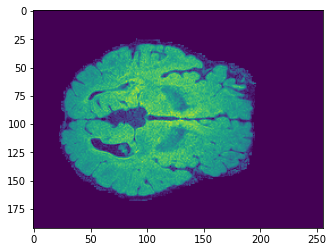

In [74]:
import nibabel as nb
import matplotlib.pyplot as plt
tmp_img = nb.load('/w/246/gzk/PPMI/MRI_PD/PPMI/100001/3D_T2_FLAIR_ND/2020-10-07_13_51_32.0/S1047642/PPMI_100001_MR_3D_T2_FLAIR_ND_br_raw_20210723152821030_171_S1047642_I1473192_ROBEX.nii').get_data()

plt.imshow(tmp_img[:, :, 150])

In [73]:
tmp_img.shape

(192, 256, 256)